<a href="https://colab.research.google.com/github/BrunoASNascimento/ml_study/blob/master/ml_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_gbq

In [ ]:
sql ="""
SELECT
  *
FROM (
  SELECT
    DISTINCT forecastType,
    stationHWID,
    name,
    forecastDate,
    hour,
    pc forecast_pc,
    ps forecast_ps,
    rh forecast_rh,
    tp forecast_tp,
    tc forecast_tc,
    rd forecast_rd,
    ws forecast_ws,
    DATETIME_DIFF( datetime(hour),
      datetime(forecastDate),
      DAY) diff_date
  FROM
    `pluvion-tech.forecast.fc_belgingur`
  WHERE
    server_date IN (
    SELECT
      DISTINCT server_date_max
    FROM (
      SELECT
        DISTINCT forecastDate,
        MAX(server_date) server_date_max
      FROM
        `pluvion-tech.forecast.fc_belgingur`
      WHERE
        server_date IS NOT NULL
      GROUP BY
        1))
    AND stationHWID IN ('001D0A00D5AB',
      '001D0A00E2C7',
      '001D0A00D684',
      '001D0A00D0D9',
      '001D0A00E305'))
LEFT JOIN (
  SELECT
    DISTINCT stationHWID hwid,
    TIMESTAMP_TRUNC(stationTime, HOUR) stationTime,    
    SUM(pc) obs_pc_sum
  FROM (
    SELECT
      DISTINCT stationHWID,
      stationTime,
      tp,
      rh,
      ws,
      pc
    FROM
      `pluvion-tech.pluvion_weather_others.weather_tamoios_mongodb`)
  GROUP BY
    1,
    2)
ON
  hwid= stationHWID
  AND stationTime=hour
WHERE
  obs_pc_sum IS NOT NULL and diff_date >= 0
"""

In [ ]:
df =pandas_gbq.read_gbq(sql,project_id='pluvion-tech')
df.head(20)


forecastType   stationHWID  ...               stationTime obs_pc_sum
0          HD5D  001D0A00E2C7  ... 2020-01-31 04:00:00+00:00       0.00
1        HD5DSM  001D0A00E2C7  ... 2020-01-31 04:00:00+00:00       0.00
2        SD10DM  001D0A00E305  ... 2020-01-31 04:00:00+00:00       0.00
3         SD10D  001D0A00D5AB  ... 2020-01-31 15:00:00+00:00       0.00
4        SD10DM  001D0A00E305  ... 2020-01-31 15:00:00+00:00       0.00
5        HD5DSM  001D0A00D684  ... 2020-01-31 15:00:00+00:00       0.00
6         SD10D  001D0A00D684  ... 2020-01-31 15:00:00+00:00       0.00
7         SD10D  001D0A00E2C7  ... 2020-01-31 09:00:00+00:00       0.00
8        SD10DM  001D0A00D0D9  ... 2020-01-31 09:00:00+00:00       0.00
9        SD10DM  001D0A00D684  ... 2020-01-31 09:00:00+00:00       0.00
10       HD5DSM  001D0A00E2C7  ... 2020-01-31 06:00:00+00:00       0.00
11        SD10D  001D0A00D0D9  ... 2020-01-31 06:00:00+00:00       0.00
12       SD10DM  001D0A00E305  ... 2020-01-31 03:00:00+00:00       1.40
13         HD5D  001D0A00D0D9  ... 2020-01-31 03:00:00+00:00       3.05
14        SD10D  001D0A00D684  ... 2020-01-31 03:00:00+00:00       1.20
15       SD10DM  001D0A00D684  ... 2020-01-31 03:00:00+00:00       1.20
16         HD5D  001D0A00D5AB  ... 2020-01-31 14:00:00+00:00       0.20
17        SD10D  001D0A00D5AB  ... 2020-01-31 14:00:00+00:00       0.20
18         HD5D  001D0A00E2C7  ... 2020-01-31 14:00:00+00:00       0.00
19        SD10D  001D0A00D0D9  ... 2020-01-31 14:00:00+00:00       0.00

[20 rows x 16 columns]

In [ ]:
from google.colab import drive
drive.mount('/data_set')

Drive already mounted at /data_set; to attempt to forcibly remount, call drive.mount("/data_set", force_remount=True).


In [ ]:
directory = '/data_set/My Drive/ML/google_for_startups/'

In [ ]:
df.to_csv(directory +'data_set_hour.csv', index=False)

In [ ]:
df.shape
df['obs_pc_sum'].max()

82.8

In [ ]:
columns = ['forecastType','stationHWID','stationTime','forecast_pc','forecast_ps','forecast_rh','forecast_tp','forecast_tc','forecast_rd','forecast_ws','diff_date','obs_pc_sum']

In [ ]:
df_subset_HD5DSM = df[df['forecastType']=='HD5DSM'].reset_index()[columns]
df_subset_HD5DSM.head(10)

forecastType   stationHWID  ... diff_date  obs_pc_sum
0       HD5DSM  001D0A00E2C7  ...         0         0.0
1       HD5DSM  001D0A00D684  ...         0         0.0
2       HD5DSM  001D0A00E2C7  ...         0         0.0
3       HD5DSM  001D0A00E2C7  ...         0         0.0
4       HD5DSM  001D0A00D684  ...         0         0.0
5       HD5DSM  001D0A00D0D9  ...         0         0.0
6       HD5DSM  001D0A00E2C7  ...         0         0.0
7       HD5DSM  001D0A00D684  ...         0         0.0
8       HD5DSM  001D0A00D0D9  ...         0         0.0
9       HD5DSM  001D0A00E2C7  ...         4         0.0

[10 rows x 12 columns]

In [ ]:
df_subset_HD5DSM.corr()

forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc     1.000000     0.006389  ...   0.014057    0.060667
forecast_ps     0.006389     1.000000  ...  -0.038382    0.012840
forecast_rh     0.119872    -0.131796  ...  -0.039911    0.064262
forecast_tp    -0.011858     0.255732  ...  -0.021628   -0.019216
forecast_tc     0.105150     0.066495  ...  -0.058679    0.051535
forecast_rd    -0.086518    -0.026755  ...  -0.039602   -0.080011
forecast_ws     0.042367    -0.041226  ...   0.079947   -0.001183
diff_date       0.014057    -0.038382  ...   1.000000    0.006612
obs_pc_sum      0.060667     0.012840  ...   0.006612    1.000000

[9 rows x 9 columns]

In [ ]:
df_subset_HD5DSM.describe().round(2)

forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
count     76092.00     76092.00  ...   76092.00    76092.00
mean          0.37       965.11  ...       2.32        0.31
std           1.93        21.89  ...       1.74        1.79
min           0.00       917.10  ...       0.00        0.00
25%           0.00       961.80  ...       1.00        0.00
50%           0.00       967.10  ...       2.00        0.00
75%           0.10       972.40  ...       4.00        0.00
max         113.20      1011.90  ...      10.00       82.80

[8 rows x 9 columns]

In [ ]:
stations = df_subset_HD5DSM['stationHWID'].drop_duplicates().values
stations

array(['001D0A00E2C7', '001D0A00D684', '001D0A00D0D9', '001D0A00D5AB',
       '001D0A00E305'], dtype=object)

In [ ]:
for station in stations:
    print(f'##################################### {station} #####################################')
    print(df_subset_HD5DSM[df_subset_HD5DSM['stationHWID']==station].corr().round(3))

##################################### 001D0A00E2C7 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.016  ...      0.013       0.080
forecast_ps       -0.016        1.000  ...     -0.137       0.028
forecast_rh        0.126        0.358  ...     -0.056       0.067
forecast_tp       -0.019       -0.500  ...     -0.011      -0.022
forecast_tc        0.109        0.294  ...     -0.057       0.067
forecast_rd       -0.091       -0.067  ...     -0.033      -0.096
forecast_ws        0.034       -0.090  ...      0.067       0.008
diff_date          0.013       -0.137  ...      1.000      -0.000
obs_pc_sum         0.080        0.028  ...     -0.000       1.000

[9 rows x 9 columns]
##################################### 001D0A00D684 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.050  ...      0.013       0.032
forecast

In [ ]:
diff_dates = df_subset_HD5DSM['diff_date'].drop_duplicates().sort_values(ascending=True).values
print(diff_dates)

[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
for diff_date in diff_dates:
    print(f'##################################### {diff_date} #####################################')
    print(df_subset_HD5DSM[df_subset_HD5DSM['diff_date']==diff_date].corr().round(3))

##################################### 0 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000        0.009  ...        NaN       0.121
forecast_ps        0.009        1.000  ...        NaN       0.005
forecast_rh        0.110       -0.183  ...        NaN       0.057
forecast_tp        0.008        0.294  ...        NaN       0.010
forecast_tc        0.090        0.045  ...        NaN       0.060
forecast_rd       -0.077       -0.016  ...        NaN      -0.075
forecast_ws        0.012       -0.040  ...        NaN       0.019
diff_date            NaN          NaN  ...        NaN         NaN
obs_pc_sum         0.121        0.005  ...        NaN       1.000

[9 rows x 9 columns]
##################################### 1 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000        0.007  ...        NaN       0.098
forecast_ps        0.007      

In [ ]:
for station in stations:
    for diff_date in diff_dates:
        print(f'##################################### {station} - diff {diff_date} #####################################')
        print(df_subset_HD5DSM[df_subset_HD5DSM['diff_date']==diff_date].corr().round(3))

##################################### 001D0A00E2C7 - diff 0 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000        0.009  ...        NaN       0.121
forecast_ps        0.009        1.000  ...        NaN       0.005
forecast_rh        0.110       -0.183  ...        NaN       0.057
forecast_tp        0.008        0.294  ...        NaN       0.010
forecast_tc        0.090        0.045  ...        NaN       0.060
forecast_rd       -0.077       -0.016  ...        NaN      -0.075
forecast_ws        0.012       -0.040  ...        NaN       0.019
diff_date            NaN          NaN  ...        NaN         NaN
obs_pc_sum         0.121        0.005  ...        NaN       1.000

[9 rows x 9 columns]
##################################### 001D0A00E2C7 - diff 1 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000        0.007  ...        NaN   

In [ ]:
sql_day = """
SELECT
  *
FROM (
  SELECT
    DISTINCT forecastType,
    stationHWID,
    name,
    forecastDate,
    TIMESTAMP_TRUNC(hour, day) hour,
    SUM(pc) forecast_pc,
    AVG(ps) forecast_ps,
    AVG(rh) forecast_rh,
    AVG(tp) forecast_tp,
    AVG(tc) forecast_tc,
    AVG(rd) forecast_rd,
    AVG(ws) forecast_ws,
    DATETIME_DIFF( datetime(hour),
      datetime(forecastDate),
      DAY) diff_date
  FROM
    `pluvion-tech.forecast.fc_belgingur`
  WHERE
    server_date IN (
    SELECT
      DISTINCT server_date_max
    FROM (
      SELECT
        DISTINCT forecastDate,
        MAX(server_date) server_date_max
      FROM
        `pluvion-tech.forecast.fc_belgingur`
      WHERE
        server_date IS NOT NULL
      GROUP BY
        1))
    AND stationHWID IN ('001D0A00D5AB',
      '001D0A00E2C7',
      '001D0A00D684',
      '001D0A00D0D9',
      '001D0A00E305')
  GROUP BY
    1,
    2,
    3,
    4,
    5,
    diff_date)
LEFT JOIN (
  SELECT
    DISTINCT stationHWID hwid,
    TIMESTAMP_TRUNC(stationTime, day) stationTime,
    SUM(pc) obs_pc_sum
  FROM (
    SELECT
      DISTINCT stationHWID,
      stationTime,
      tp,
      rh,
      ws,
      pc
    FROM
      `pluvion-tech.pluvion_weather_others.weather_tamoios_mongodb`)
  GROUP BY
    1,
    2)
ON
  hwid= stationHWID
  AND stationTime=hour
WHERE
  obs_pc_sum IS NOT NULL
  AND diff_date >= 0
"""

In [ ]:
df_day =pandas_gbq.read_gbq(sql,project_id='pluvion-tech')
df_day.head(20)

forecastType   stationHWID  ...               stationTime obs_pc_sum
0          HD5D  001D0A00E2C7  ... 2020-01-31 04:00:00+00:00       0.00
1        HD5DSM  001D0A00E2C7  ... 2020-01-31 04:00:00+00:00       0.00
2        SD10DM  001D0A00E305  ... 2020-01-31 04:00:00+00:00       0.00
3         SD10D  001D0A00D5AB  ... 2020-01-31 15:00:00+00:00       0.00
4        SD10DM  001D0A00E305  ... 2020-01-31 15:00:00+00:00       0.00
5        HD5DSM  001D0A00D684  ... 2020-01-31 15:00:00+00:00       0.00
6         SD10D  001D0A00D684  ... 2020-01-31 15:00:00+00:00       0.00
7         SD10D  001D0A00E2C7  ... 2020-01-31 09:00:00+00:00       0.00
8        SD10DM  001D0A00D0D9  ... 2020-01-31 09:00:00+00:00       0.00
9        SD10DM  001D0A00D684  ... 2020-01-31 09:00:00+00:00       0.00
10       HD5DSM  001D0A00E2C7  ... 2020-01-31 06:00:00+00:00       0.00
11        SD10D  001D0A00D0D9  ... 2020-01-31 06:00:00+00:00       0.00
12       SD10DM  001D0A00E305  ... 2020-01-31 03:00:00+00:00       1.40
13         HD5D  001D0A00D0D9  ... 2020-01-31 03:00:00+00:00       3.05
14        SD10D  001D0A00D684  ... 2020-01-31 03:00:00+00:00       1.20
15       SD10DM  001D0A00D684  ... 2020-01-31 03:00:00+00:00       1.20
16         HD5D  001D0A00D5AB  ... 2020-01-31 14:00:00+00:00       0.20
17        SD10D  001D0A00D5AB  ... 2020-01-31 14:00:00+00:00       0.20
18         HD5D  001D0A00E2C7  ... 2020-01-31 14:00:00+00:00       0.00
19        SD10D  001D0A00D0D9  ... 2020-01-31 14:00:00+00:00       0.00

[20 rows x 16 columns]

In [ ]:
df_day.to_csv(directory +'data_set_day.csv', index=False)

In [ ]:
df_subset_HD5DSM_day = df_day[df_day['forecastType']=='HD5DSM'].reset_index()[columns]
df_subset_HD5DSM_day.head(10)

forecastType   stationHWID  ... diff_date  obs_pc_sum
0       HD5DSM  001D0A00E2C7  ...         0        0.00
1       HD5DSM  001D0A00D684  ...         0        0.00
2       HD5DSM  001D0A00E2C7  ...         0        0.00
3       HD5DSM  001D0A00E2C7  ...         0        0.00
4       HD5DSM  001D0A00D684  ...         0        0.00
5       HD5DSM  001D0A00D0D9  ...         0        0.00
6       HD5DSM  001D0A00E2C7  ...         0        0.00
7       HD5DSM  001D0A00D684  ...         0        0.00
8       HD5DSM  001D0A00D0D9  ...         0        0.00
9       HD5DSM  001D0A00D0D9  ...         4        1.77

[10 rows x 12 columns]

In [ ]:
for station in stations:
    print(f'##################################### {station} #####################################')
    print(df_subset_HD5DSM_day[df_subset_HD5DSM_day['stationHWID']==station].corr().round(3))

##################################### 001D0A00E2C7 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.016  ...      0.013       0.080
forecast_ps       -0.016        1.000  ...     -0.137       0.028
forecast_rh        0.126        0.358  ...     -0.056       0.067
forecast_tp       -0.019       -0.500  ...     -0.011      -0.022
forecast_tc        0.109        0.294  ...     -0.057       0.067
forecast_rd       -0.091       -0.067  ...     -0.033      -0.096
forecast_ws        0.034       -0.090  ...      0.067       0.008
diff_date          0.013       -0.137  ...      1.000      -0.000
obs_pc_sum         0.080        0.028  ...     -0.000       1.000

[9 rows x 9 columns]
##################################### 001D0A00D684 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.050  ...      0.013       0.032
forecast

In [ ]:
for diff_date in diff_dates:
    print(f'##################################### {diff_date} #####################################')
    print(df_subset_HD5DSM_day[df_subset_HD5DSM_day['diff_date']==diff_date].corr().round(3))

##################################### 0 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000        0.009  ...        NaN       0.121
forecast_ps        0.009        1.000  ...        NaN       0.005
forecast_rh        0.110       -0.183  ...        NaN       0.057
forecast_tp        0.008        0.294  ...        NaN       0.010
forecast_tc        0.090        0.045  ...        NaN       0.060
forecast_rd       -0.077       -0.016  ...        NaN      -0.075
forecast_ws        0.012       -0.040  ...        NaN       0.019
diff_date            NaN          NaN  ...        NaN         NaN
obs_pc_sum         0.121        0.005  ...        NaN       1.000

[9 rows x 9 columns]
##################################### 1 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000        0.007  ...        NaN       0.098
forecast_ps        0.007      

In [ ]:
df_subset_SD10DM_day = df_day[df_day['forecastType']=='SD10DM'].reset_index()[columns]
df_subset_SD10DM_day.head(10)

forecastType   stationHWID  ... diff_date  obs_pc_sum
0       SD10DM  001D0A00E305  ...         0         0.0
1       SD10DM  001D0A00E305  ...         0         0.0
2       SD10DM  001D0A00D0D9  ...         0         0.0
3       SD10DM  001D0A00D684  ...         0         0.0
4       SD10DM  001D0A00E305  ...         0         1.4
5       SD10DM  001D0A00D684  ...         0         1.2
6       SD10DM  001D0A00E305  ...         0         0.0
7       SD10DM  001D0A00E305  ...         0         0.0
8       SD10DM  001D0A00D684  ...         0         0.0
9       SD10DM  001D0A00E305  ...         0         0.0

[10 rows x 12 columns]

In [ ]:
for station in stations:
    print(f'##################################### {station} #####################################')
    print(df_subset_SD10DM_day[df_subset_SD10DM_day['stationHWID']==station].corr().round(3))

##################################### 001D0A00E2C7 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.110  ...      0.018       0.076
forecast_ps       -0.110        1.000  ...     -0.367      -0.044
forecast_rh        0.172       -0.023  ...     -0.074       0.094
forecast_tp        0.021       -0.532  ...      0.030      -0.014
forecast_tc        0.174       -0.168  ...      0.018       0.096
forecast_rd       -0.070       -0.061  ...     -0.045      -0.077
forecast_ws        0.022       -0.208  ...      0.252      -0.012
diff_date          0.018       -0.367  ...      1.000       0.008
obs_pc_sum         0.076       -0.044  ...      0.008       1.000

[9 rows x 9 columns]
##################################### 001D0A00D684 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.091  ...      0.022       0.036
forecast

In [ ]:
for diff_date in diff_dates:
    print(f'##################################### {diff_date} #####################################')
    print(df_subset_SD10DM_day[df_subset_SD10DM_day['diff_date']==diff_date].corr().round(3))

##################################### 0 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.009  ...        NaN       0.148
forecast_ps       -0.009        1.000  ...        NaN      -0.009
forecast_rh        0.143       -0.176  ...        NaN       0.088
forecast_tp        0.014        0.159  ...        NaN       0.021
forecast_tc        0.138       -0.054  ...        NaN       0.103
forecast_rd       -0.071       -0.032  ...        NaN      -0.069
forecast_ws        0.032       -0.083  ...        NaN       0.023
diff_date            NaN          NaN  ...        NaN         NaN
obs_pc_sum         0.148       -0.009  ...        NaN       1.000

[9 rows x 9 columns]
##################################### 1 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.008  ...        NaN       0.108
forecast_ps       -0.008      

In [ ]:
for station in stations:
    for diff_date in diff_dates:
        print(f'##################################### {station} - diff {diff_date} #####################################')
        df_file_SD10DM = df_subset_SD10DM_day[df_subset_SD10DM_day['diff_date']==diff_date].corr().round(3)
        df_file_SD10DM.to_csv('SD10DM'+station+'_diff_'+ str(diff_date).zfill(2)+'.csv' ,sep=';')        
        print(df_file_SD10DM)


##################################### 001D0A00E2C7 - diff 0 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.009  ...        NaN       0.148
forecast_ps       -0.009        1.000  ...        NaN      -0.009
forecast_rh        0.143       -0.176  ...        NaN       0.088
forecast_tp        0.014        0.159  ...        NaN       0.021
forecast_tc        0.138       -0.054  ...        NaN       0.103
forecast_rd       -0.071       -0.032  ...        NaN      -0.069
forecast_ws        0.032       -0.083  ...        NaN       0.023
diff_date            NaN          NaN  ...        NaN         NaN
obs_pc_sum         0.148       -0.009  ...        NaN       1.000

[9 rows x 9 columns]
##################################### 001D0A00E2C7 - diff 1 #####################################
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc        1.000       -0.008  ...        NaN   

In [ ]:
for station in stations:
    for diff_date in diff_dates:
        print(f'##################################### {station} - diff {diff_date} #####################################')
        data_remove_zero = df_subset_SD10DM_day[(df_subset_SD10DM_day['diff_date']==diff_date) & (df_subset_SD10DM_day['forecast_pc']!=0) & (df_subset_SD10DM_day['obs_pc_sum']!=0)]
        print(data_remove_zero.shape)
        print(data_remove_zero.head(5))
        print(data_remove_zero.corr().round(2))

##################################### 001D0A00E2C7 - diff 0 #####################################
(2142, 12)
     forecastType   stationHWID  ... diff_date  obs_pc_sum
107        SD10DM  001D0A00E2C7  ...         0         4.0
170        SD10DM  001D0A00E305  ...         0         1.8
752        SD10DM  001D0A00E2C7  ...         0         2.4
778        SD10DM  001D0A00E305  ...         0         2.8
2295       SD10DM  001D0A00E305  ...         0         0.8

[5 rows x 12 columns]
             forecast_pc  forecast_ps  ...  diff_date  obs_pc_sum
forecast_pc         1.00        -0.02  ...        NaN        0.20
forecast_ps        -0.02         1.00  ...        NaN       -0.01
forecast_rh         0.03        -0.41  ...        NaN       -0.06
forecast_tp         0.15         0.21  ...        NaN        0.13
forecast_tc        -0.11         0.02  ...        NaN       -0.14
forecast_rd         0.03        -0.06  ...        NaN        0.05
forecast_ws        -0.08        -0.09  ...        Na

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##################################### 001D0A00E2C7 - diff 0 #####################################
##################################### 001D0A00E2C7 - diff 1 #####################################
##################################### 001D0A00E2C7 - diff 2 #####################################
##################################### 001D0A00E2C7 - diff 3 #####################################
##################################### 001D0A00E2C7 - diff 4 #####################################
##################################### 001D0A00E2C7 - diff 5 #####################################
##################################### 001D0A00E2C7 - diff 6 #####################################
##################################### 001D0A00E2C7 - diff 7 #####################################
##################################### 001D0A00E2C7 - diff 8 #####################################
##################################### 001D0A00E2C7 - diff 9 #####################################
####################

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


##################################### 001D0A00D684 - diff 0 #####################################
##################################### 001D0A00D684 - diff 1 #####################################
##################################### 001D0A00D684 - diff 2 #####################################
##################################### 001D0A00D684 - diff 3 #####################################
##################################### 001D0A00D684 - diff 4 #####################################
##################################### 001D0A00D684 - diff 5 #####################################
##################################### 001D0A00D684 - diff 6 #####################################
##################################### 001D0A00D684 - diff 7 #####################################
##################################### 001D0A00D684 - diff 8 #####################################
##################################### 001D0A00D684 - diff 9 #####################################
####################

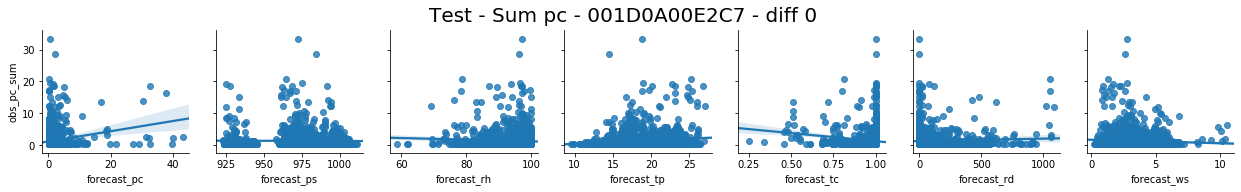

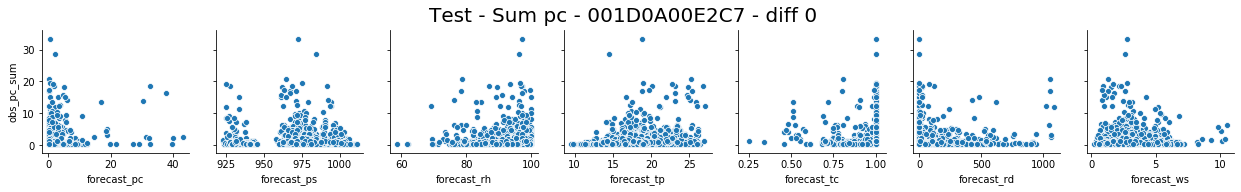

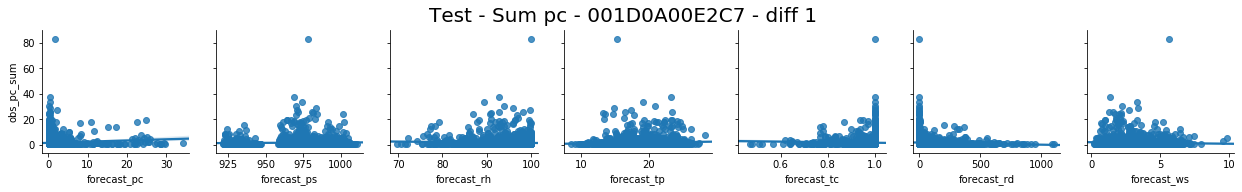

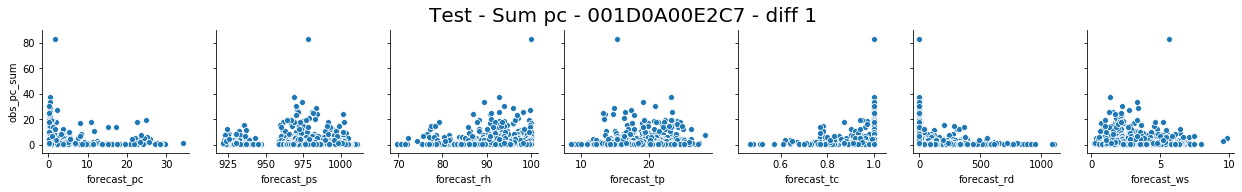

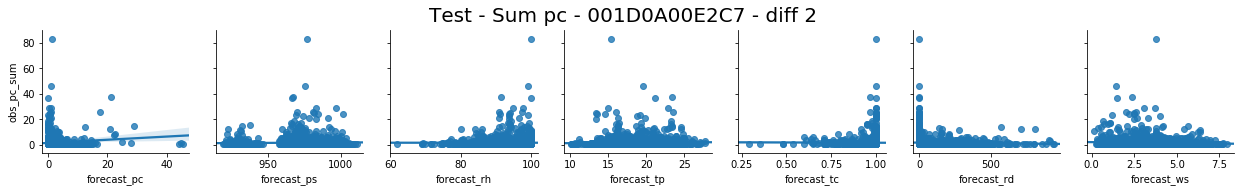

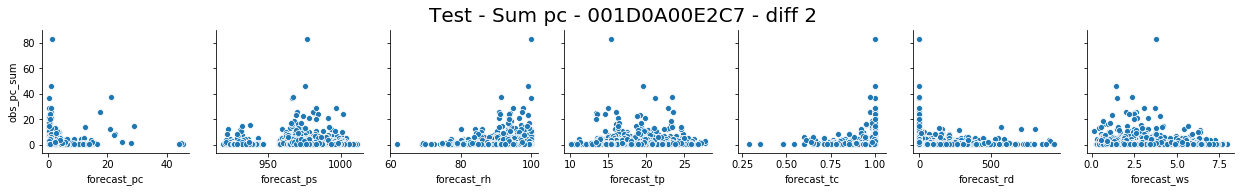

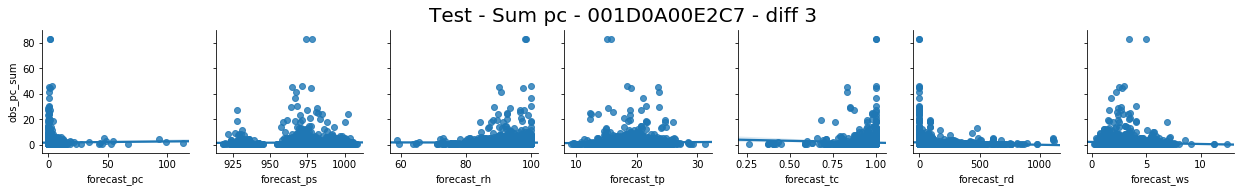

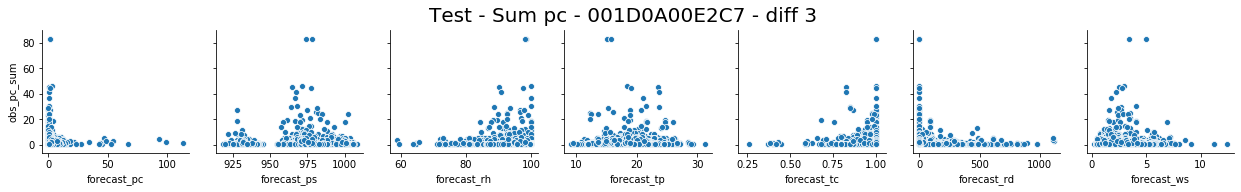

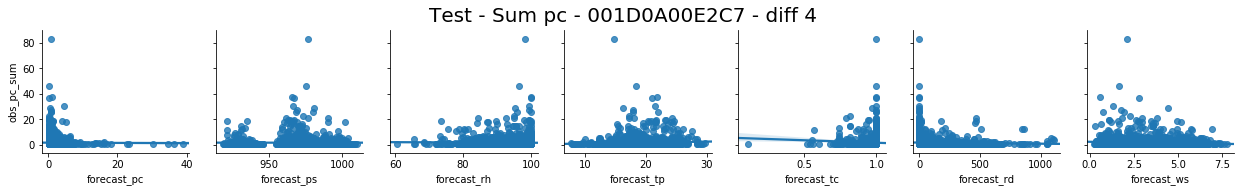

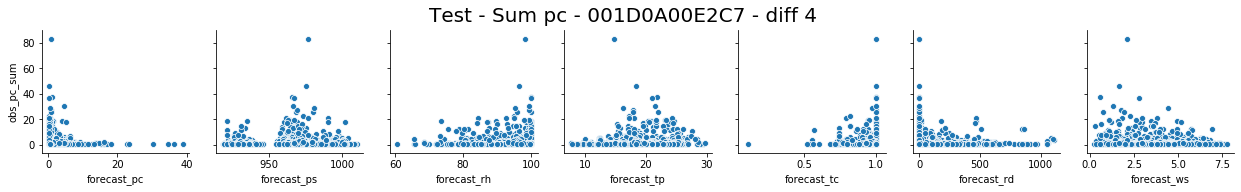

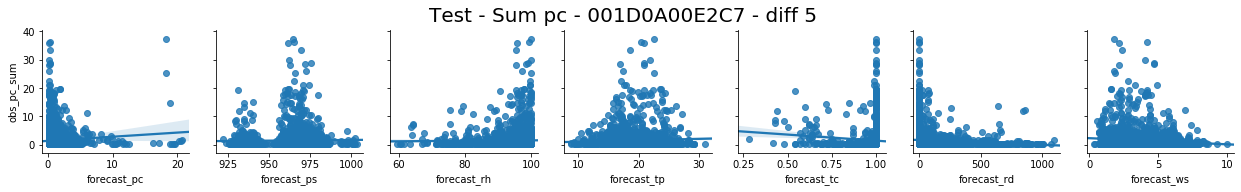

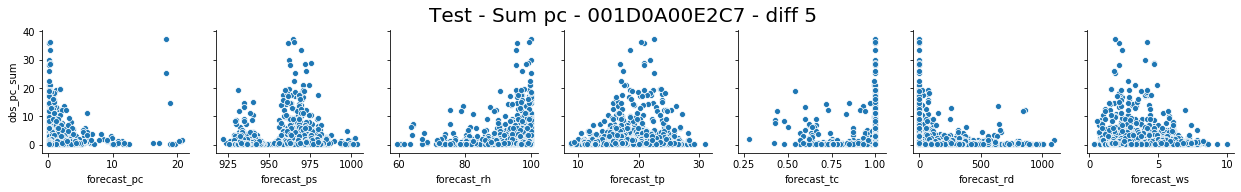

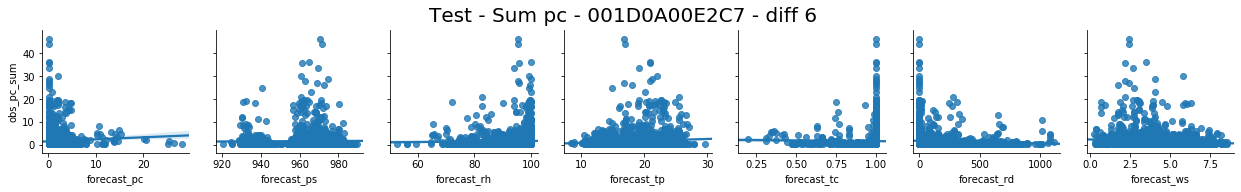

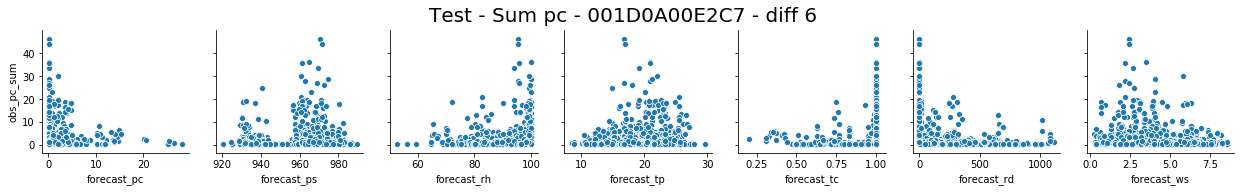

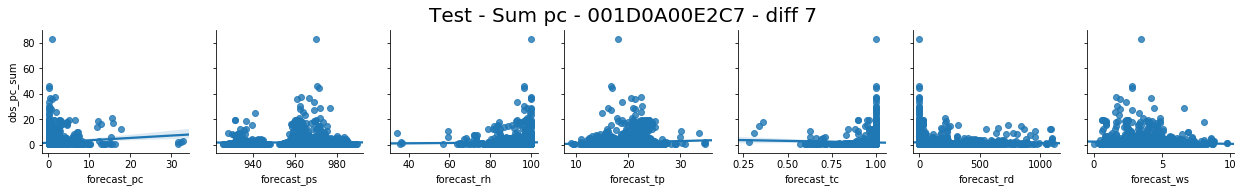

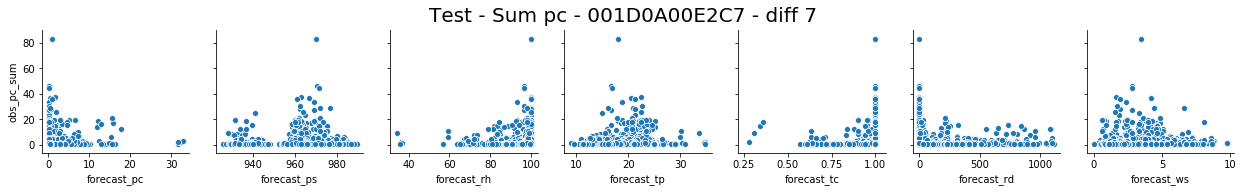

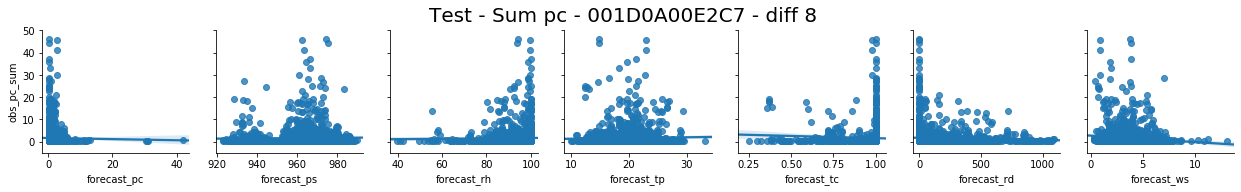

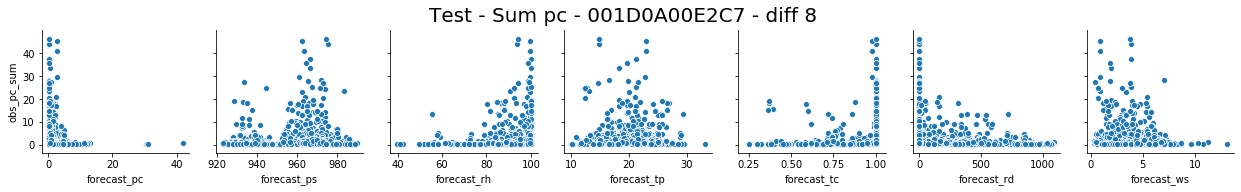

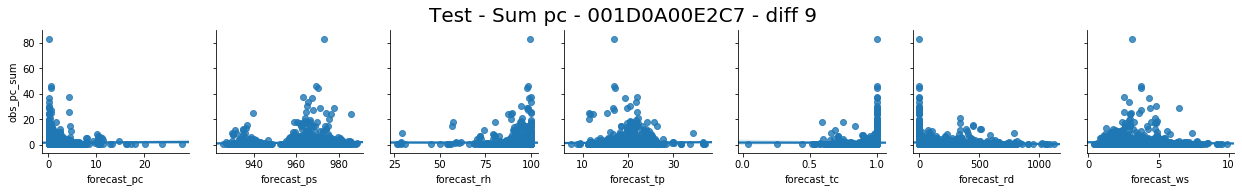

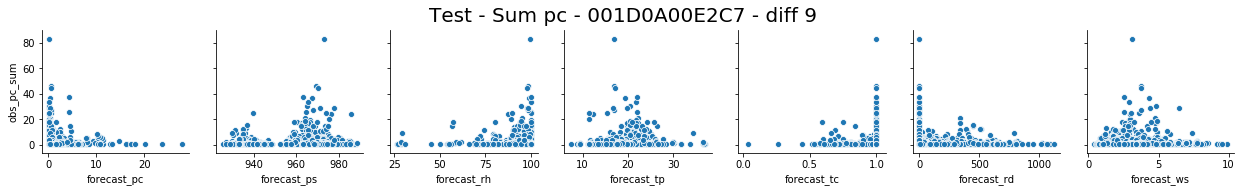

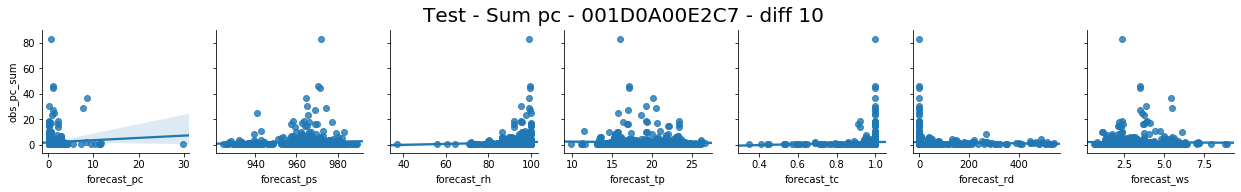

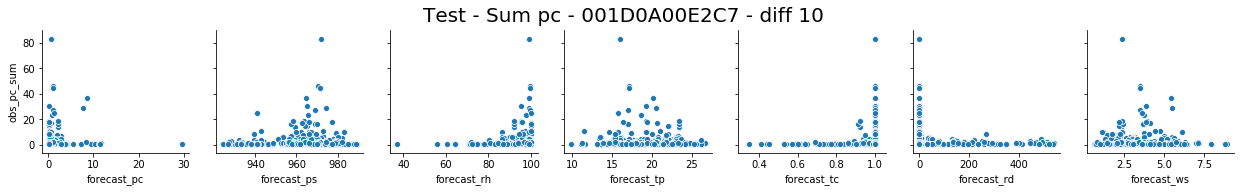

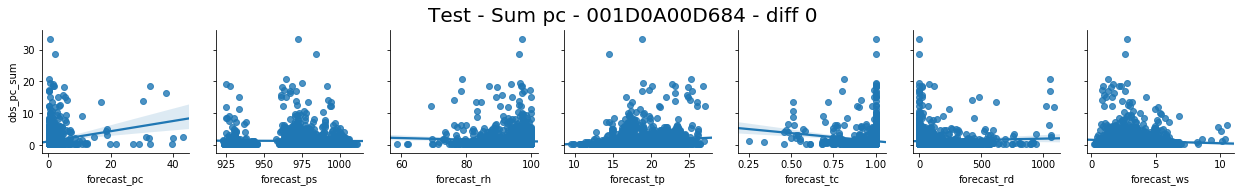

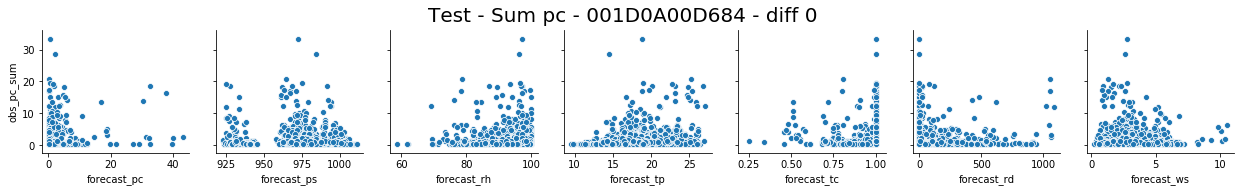

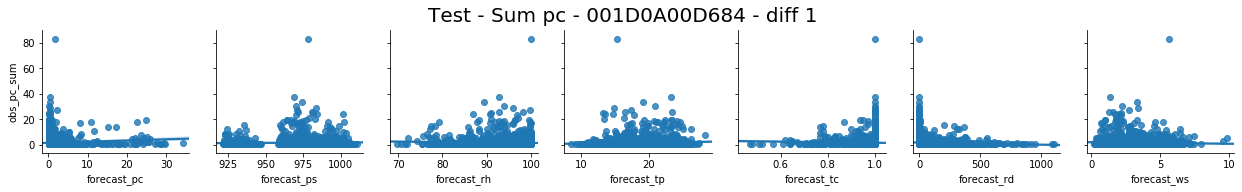

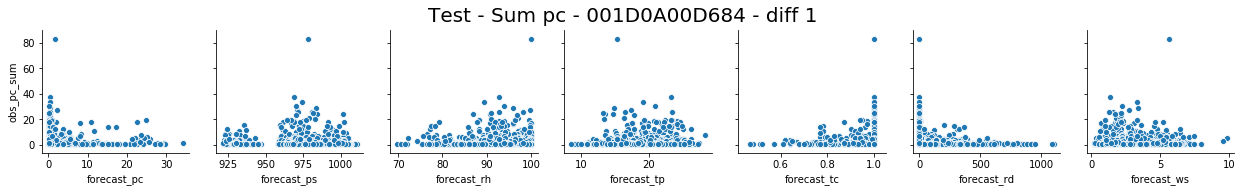

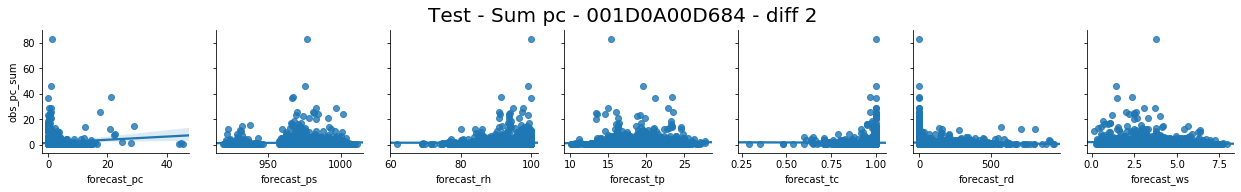

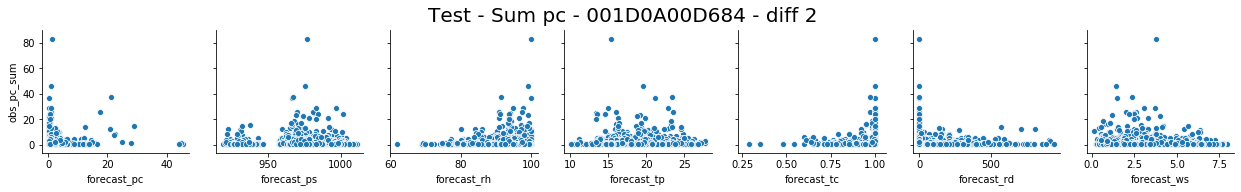

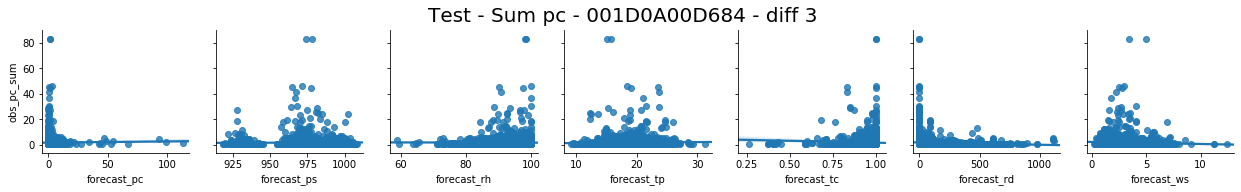

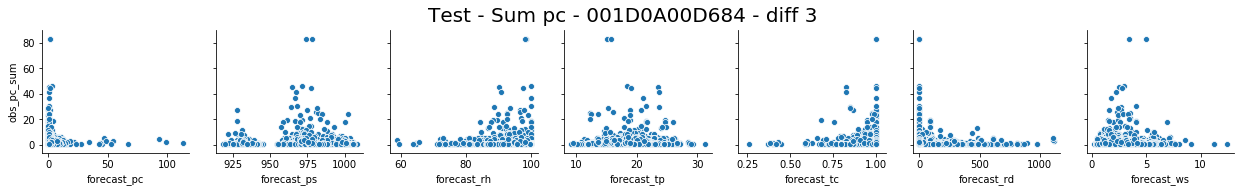

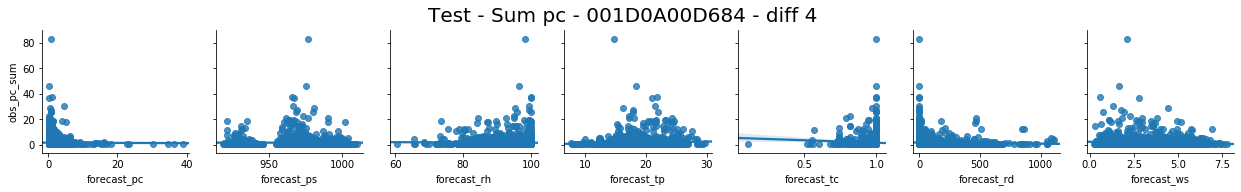

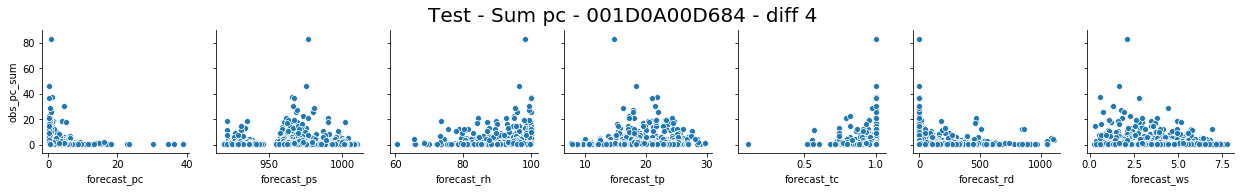

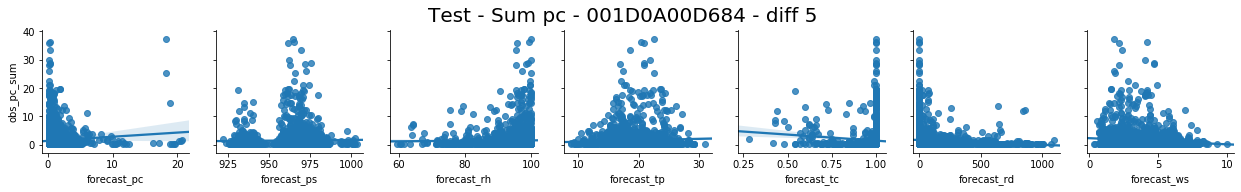

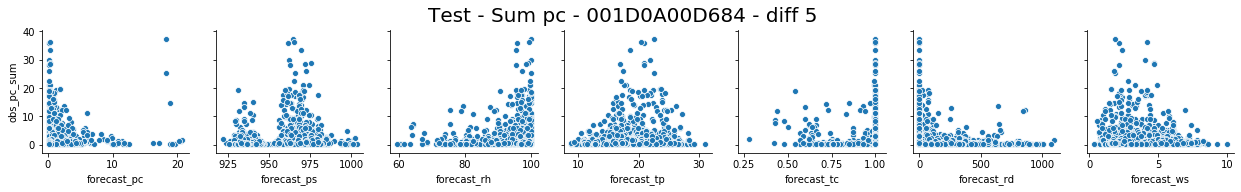

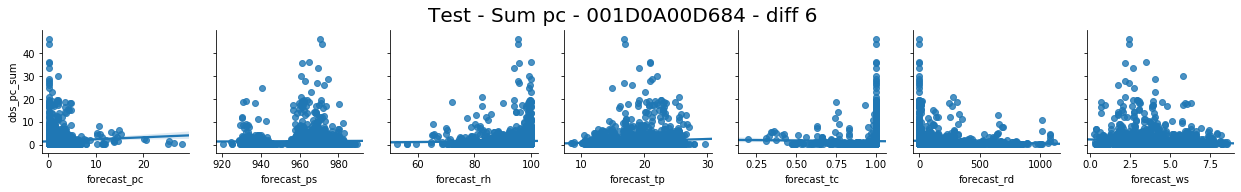

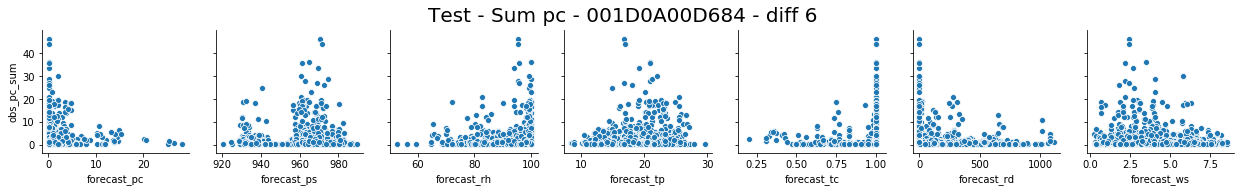

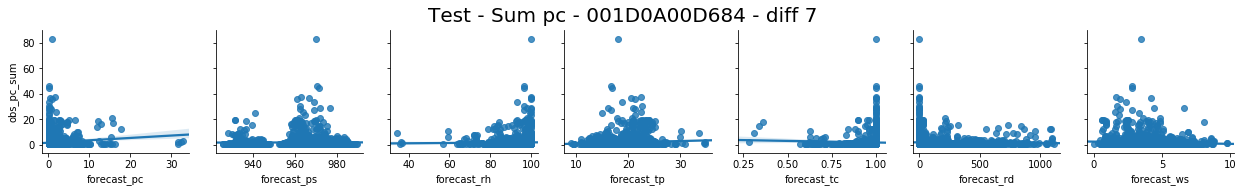

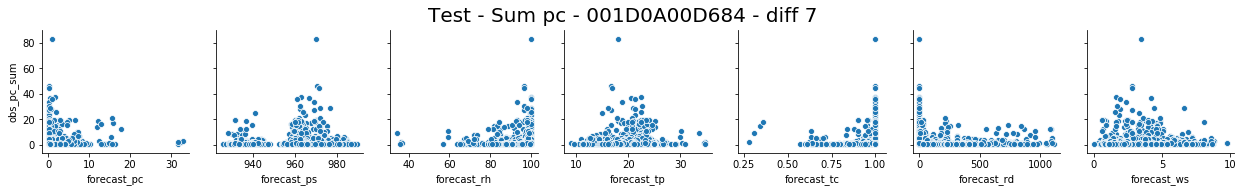

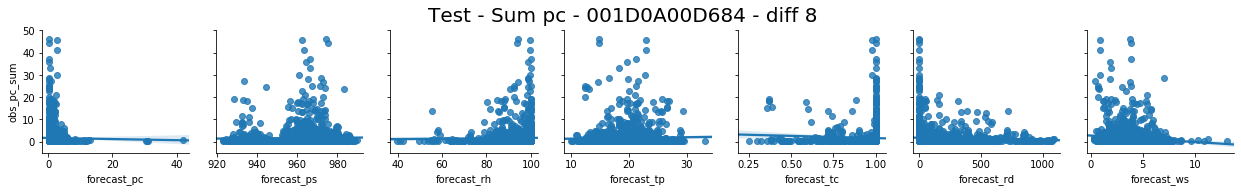

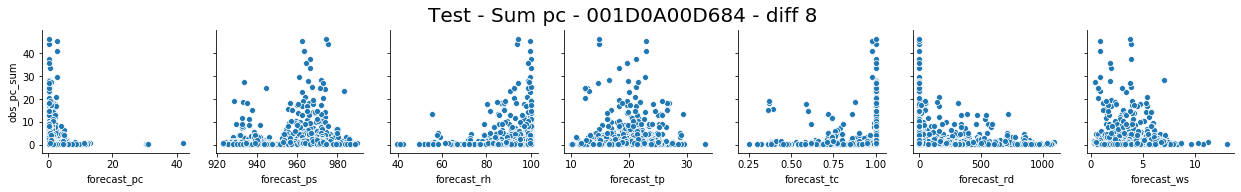

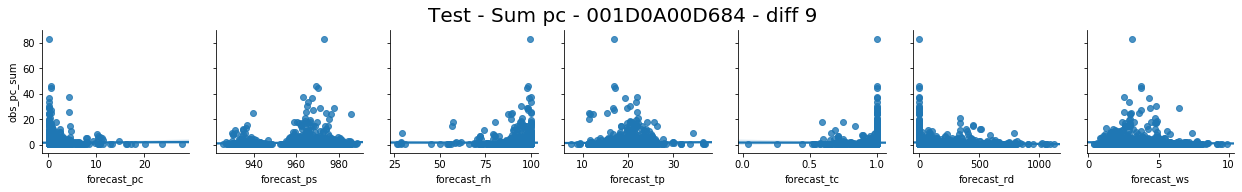

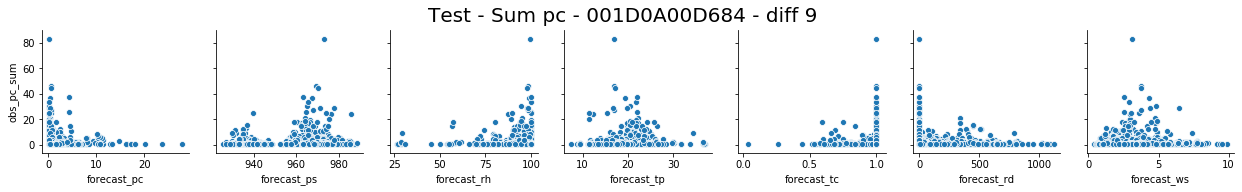

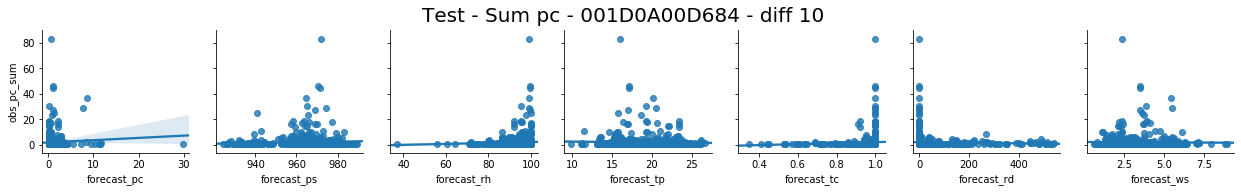

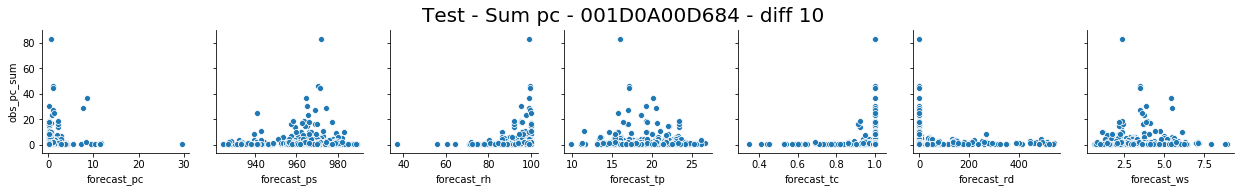

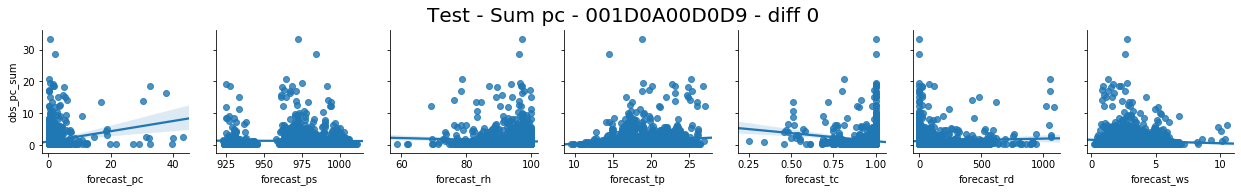

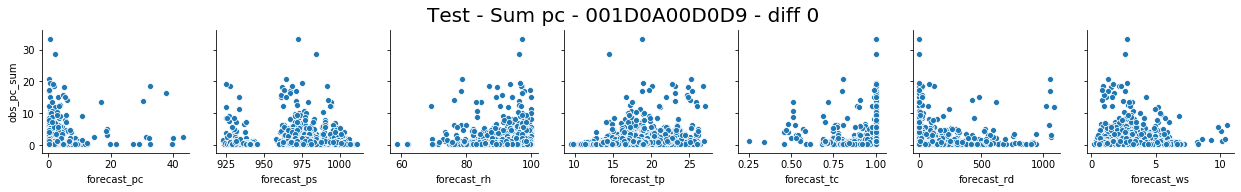

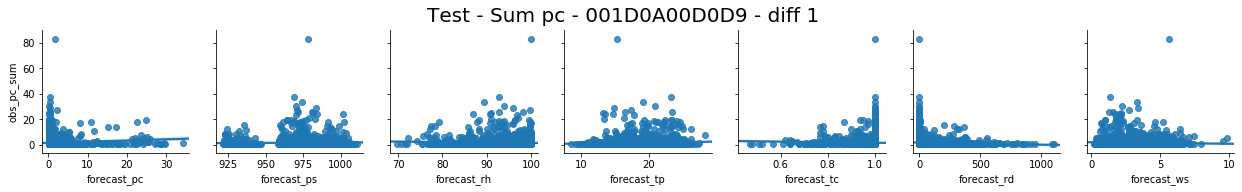

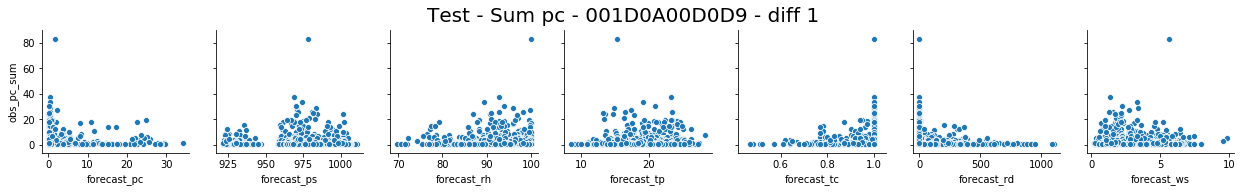

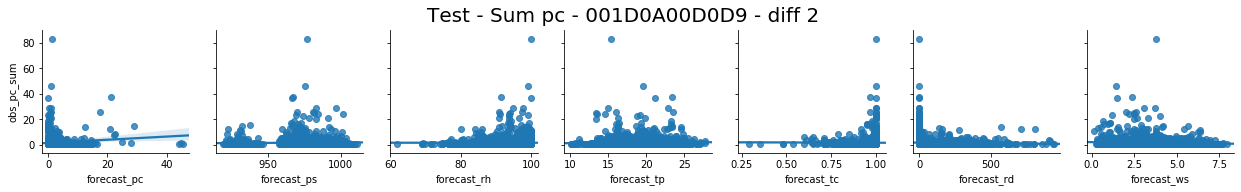

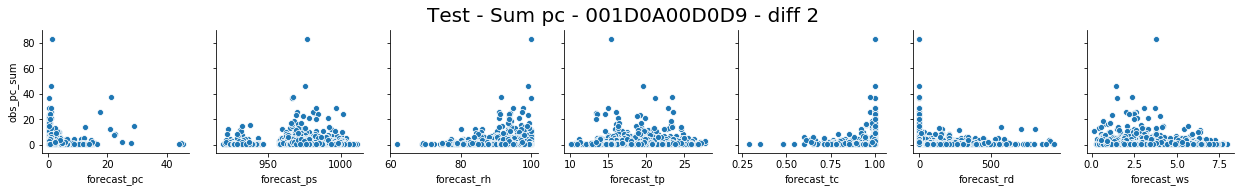

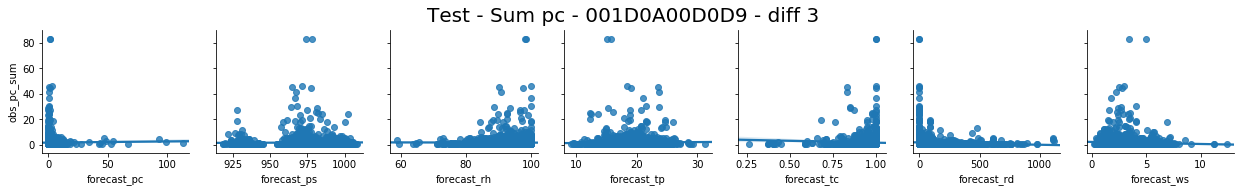

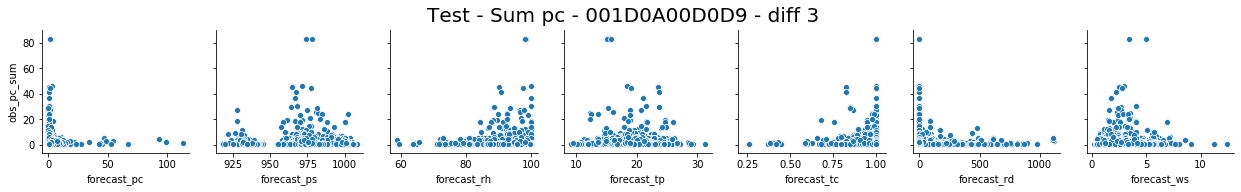

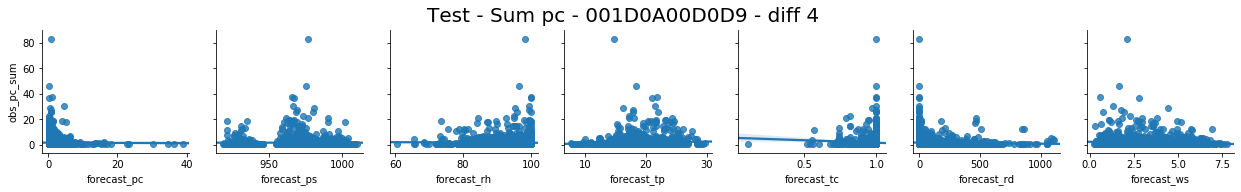

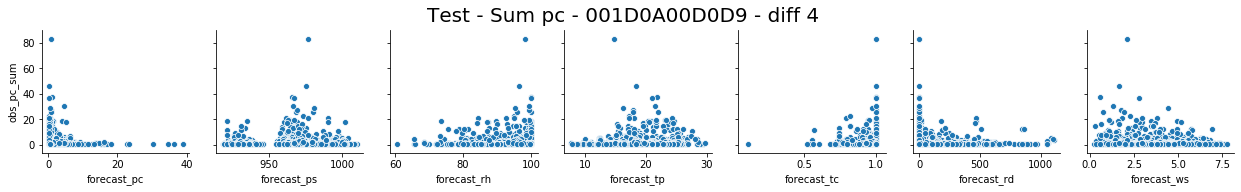

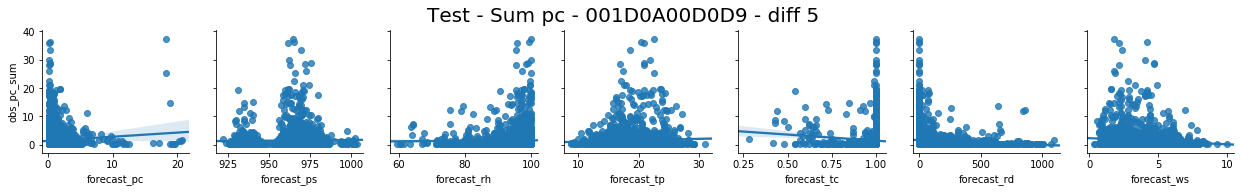

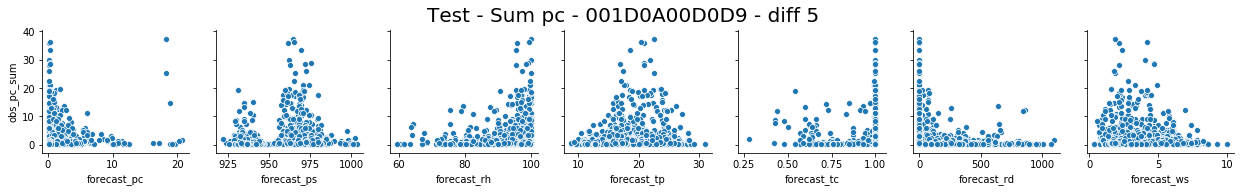

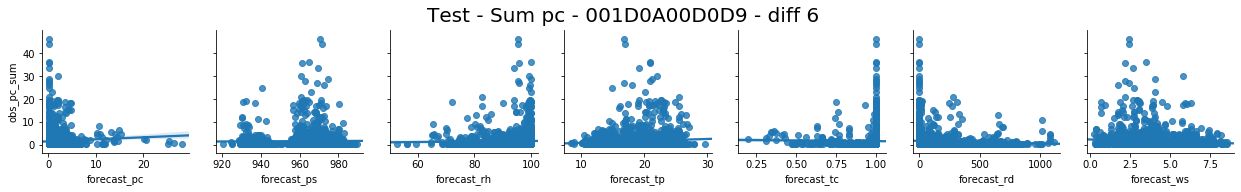

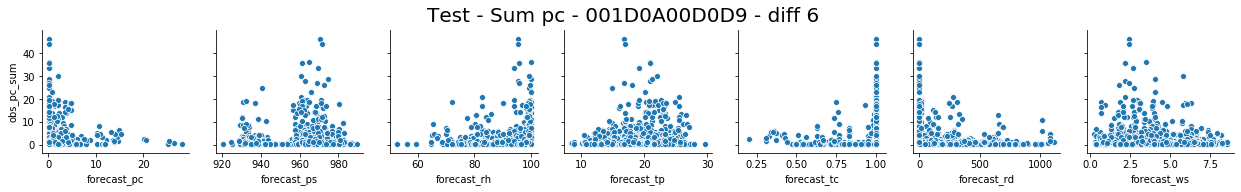

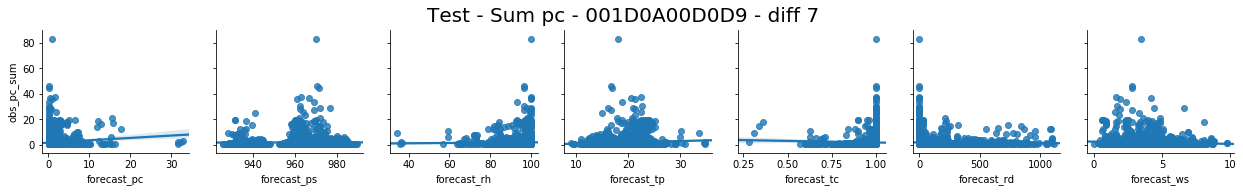

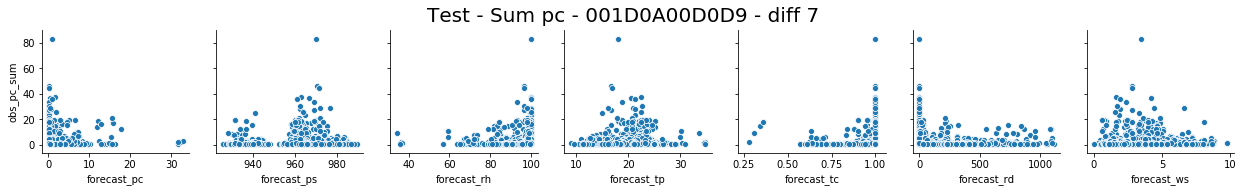

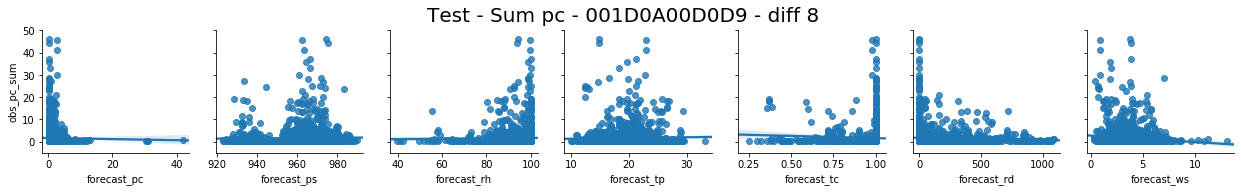

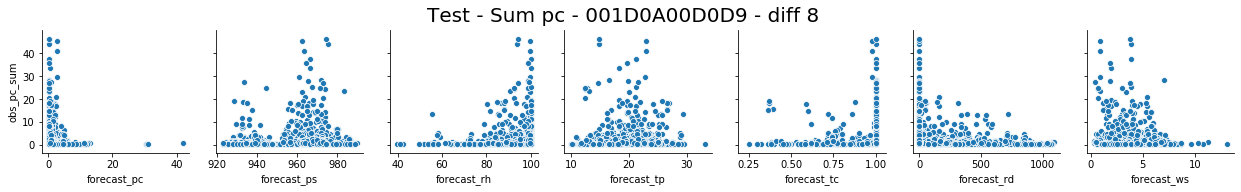

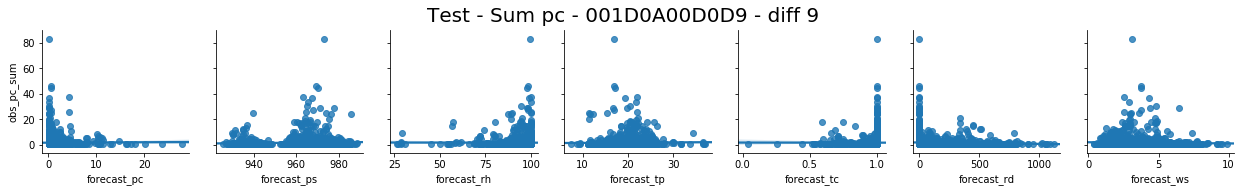

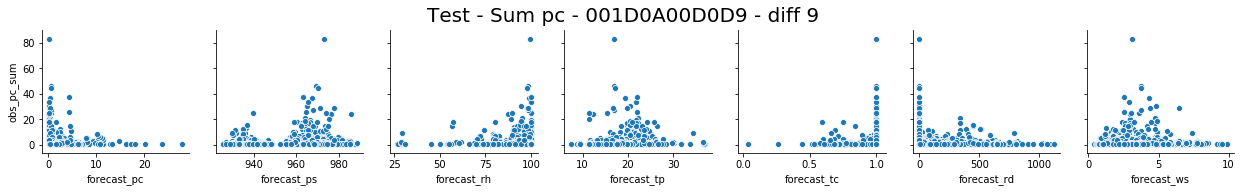

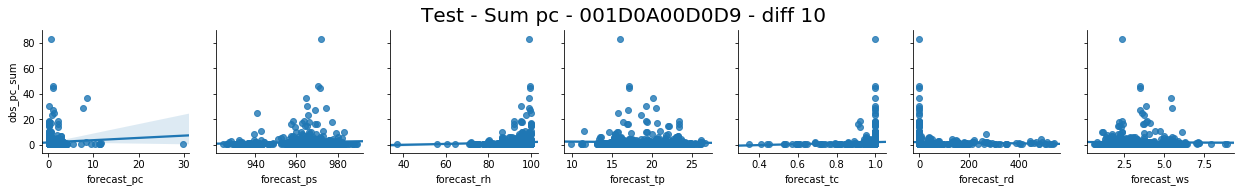

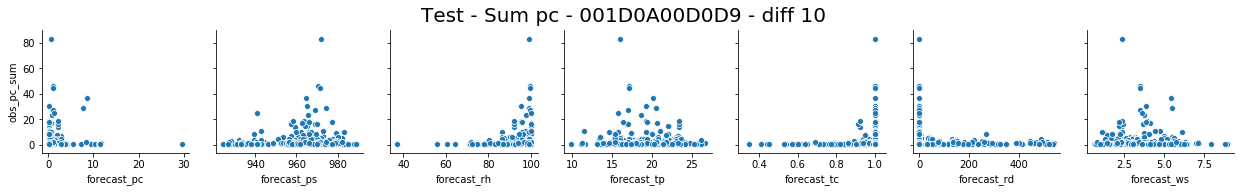

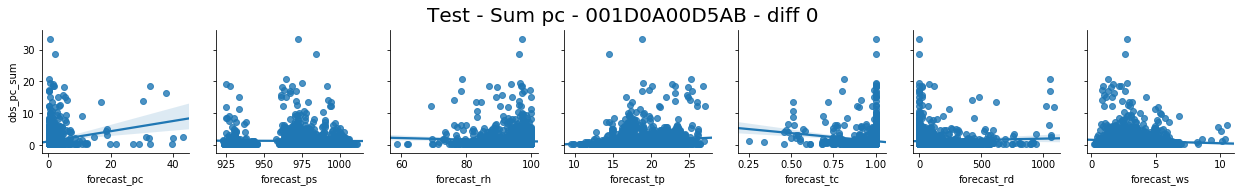

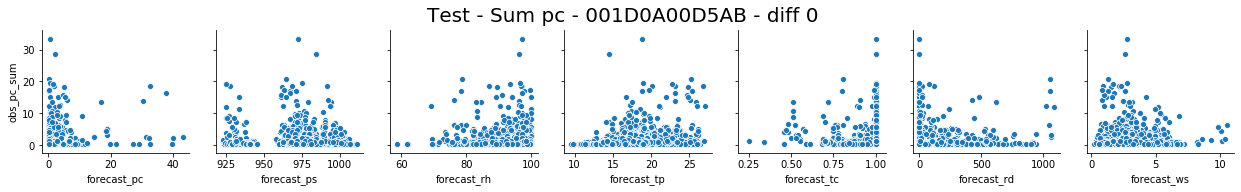

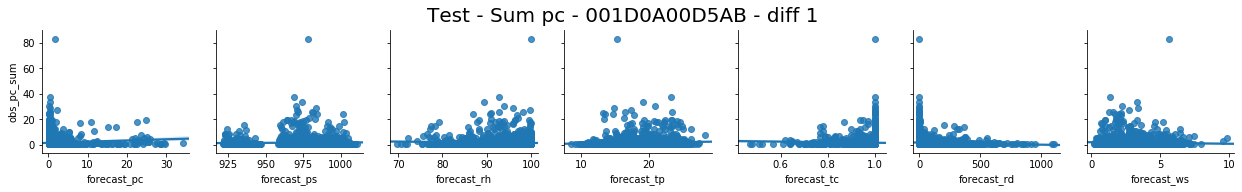

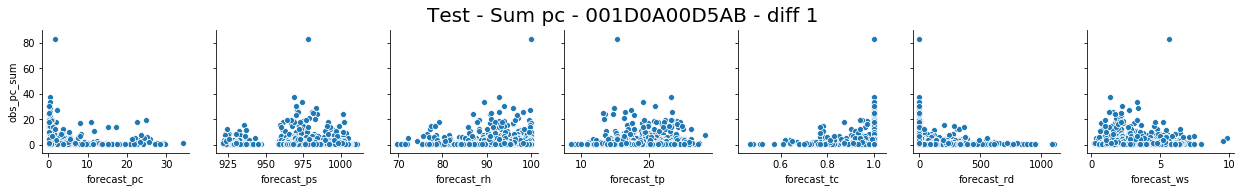

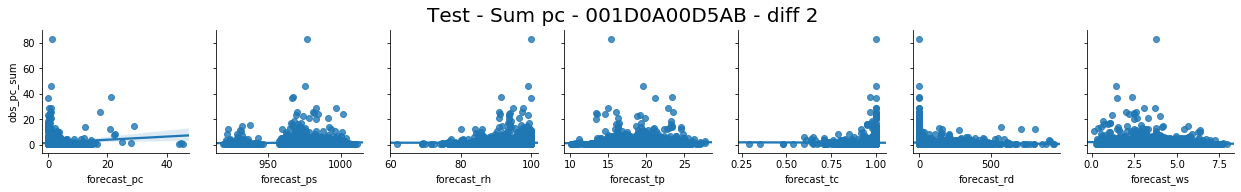

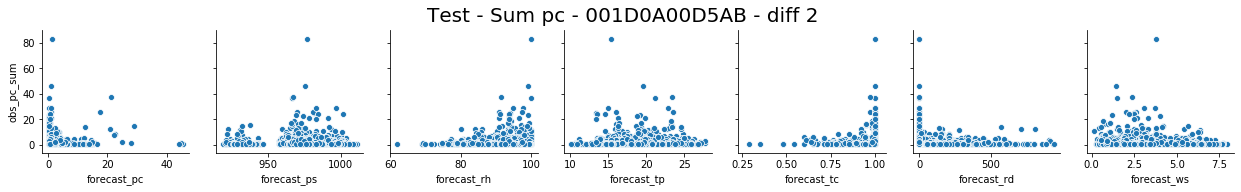

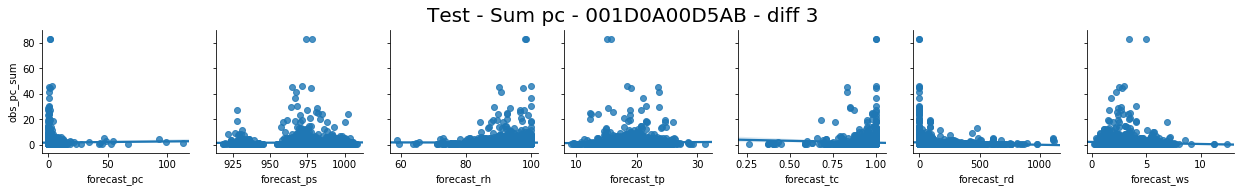

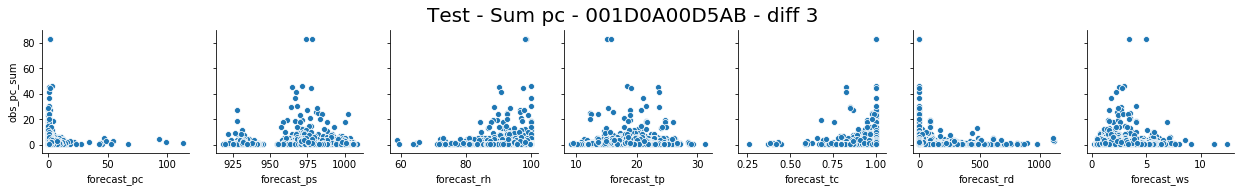

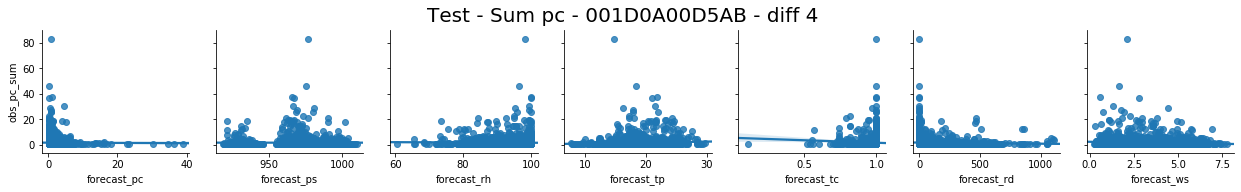

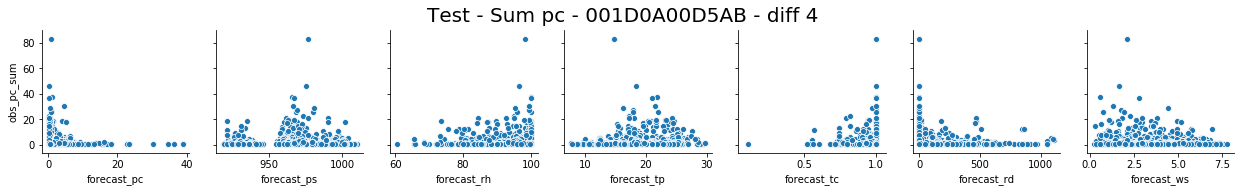

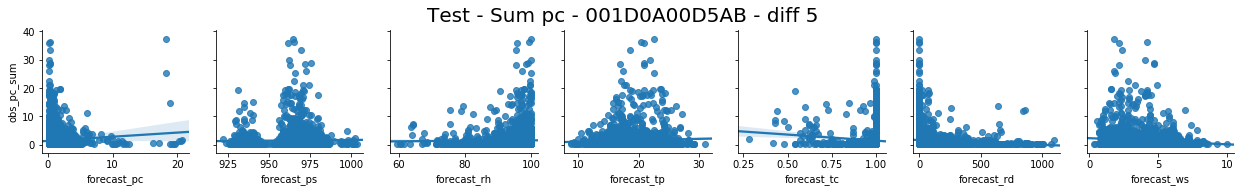

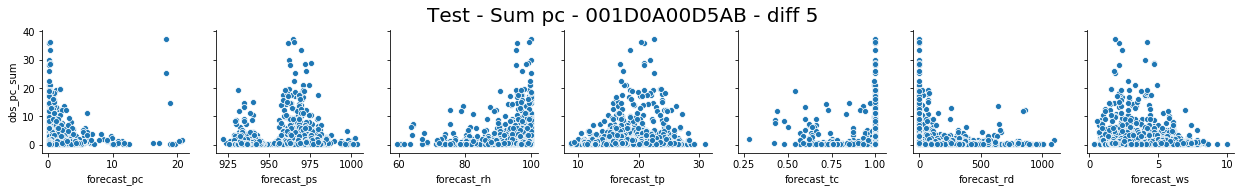

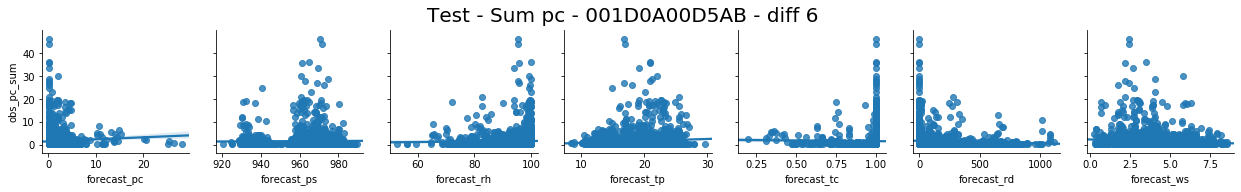

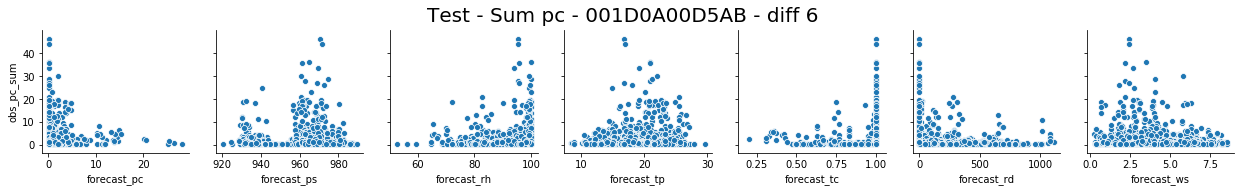

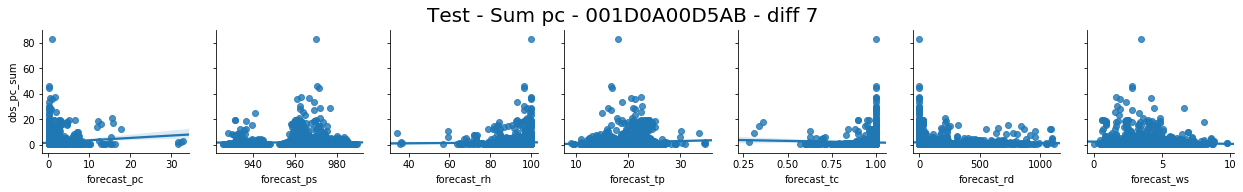

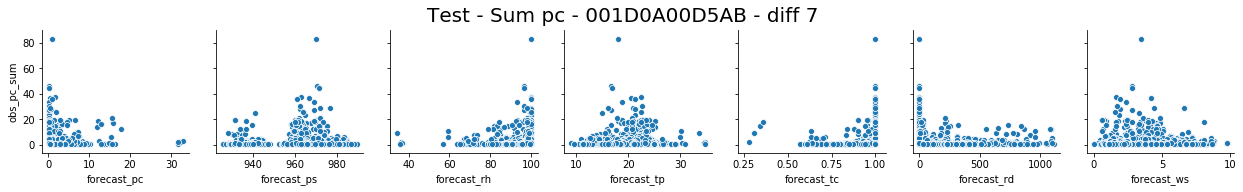

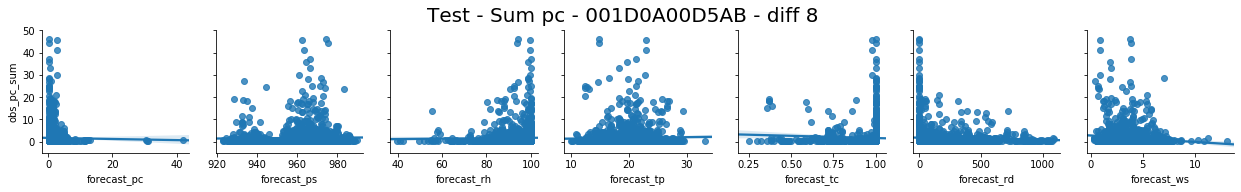

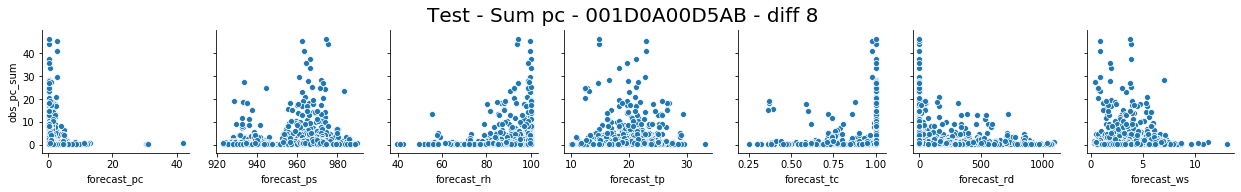

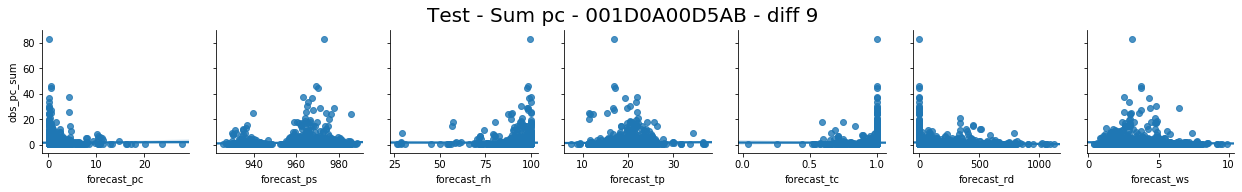

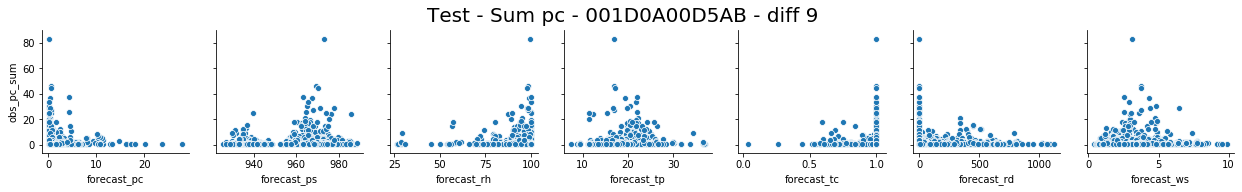

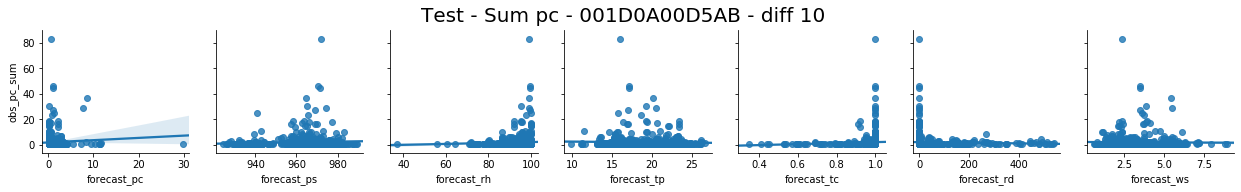

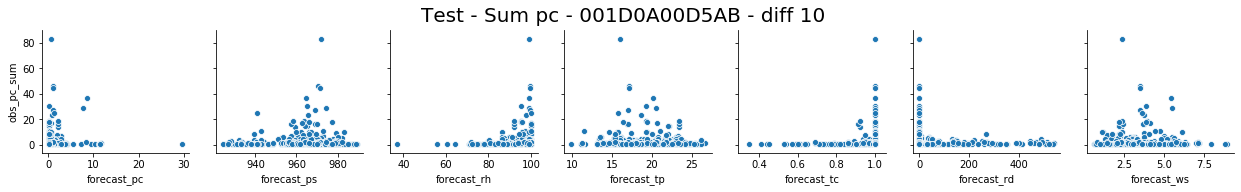

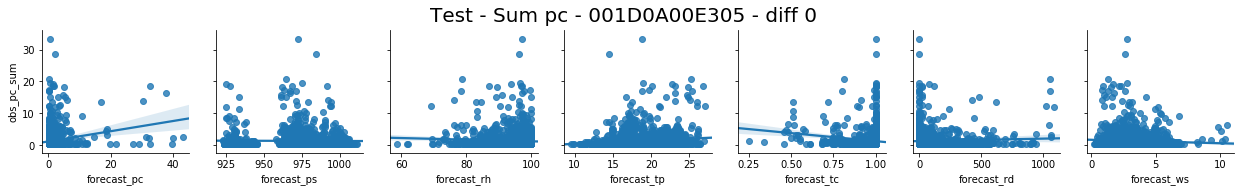

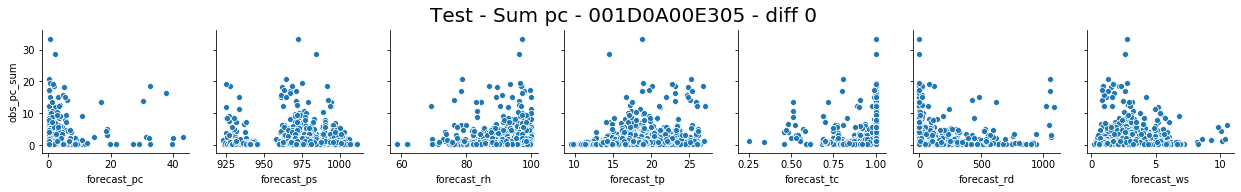

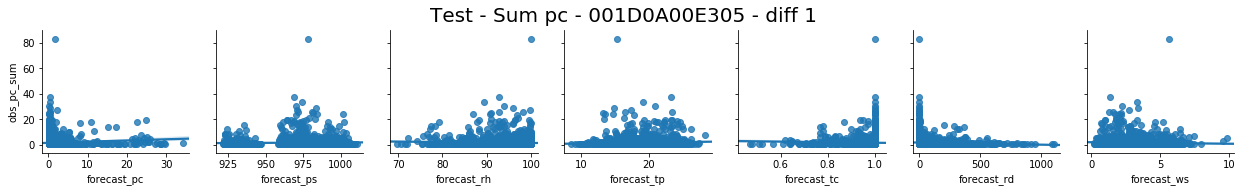

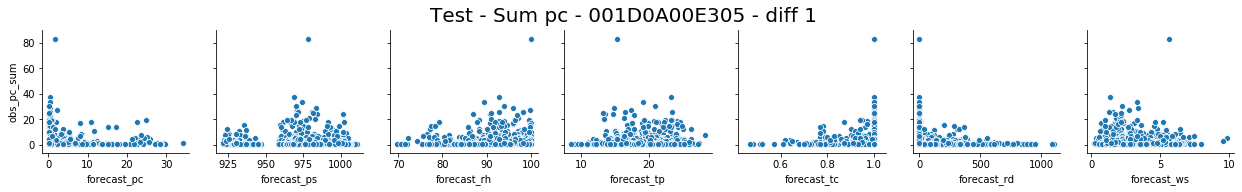

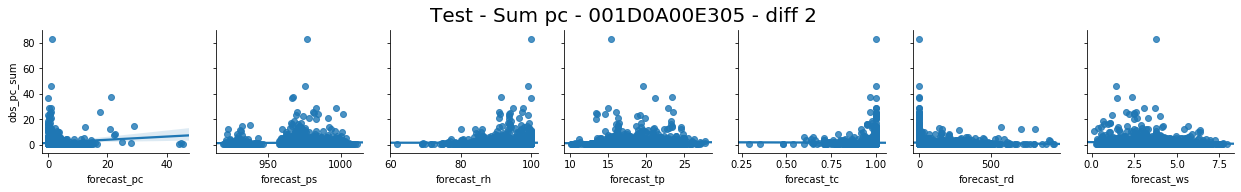

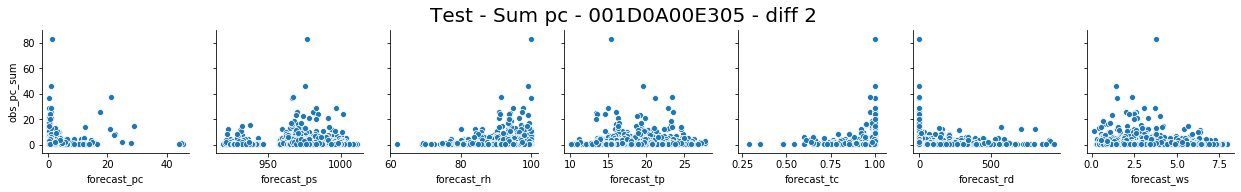

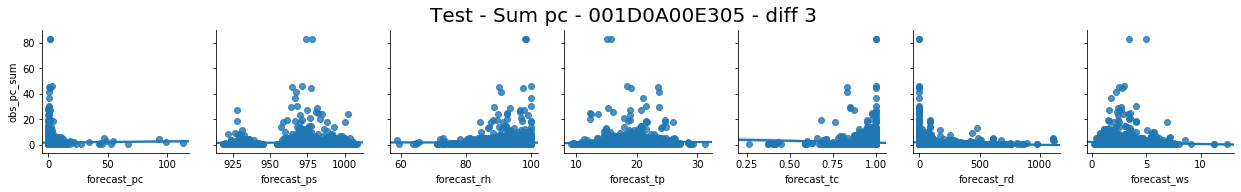

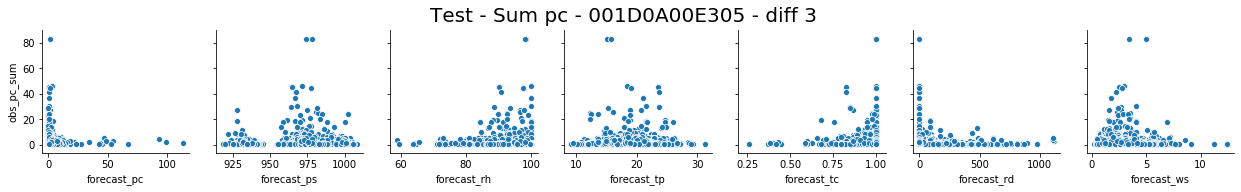

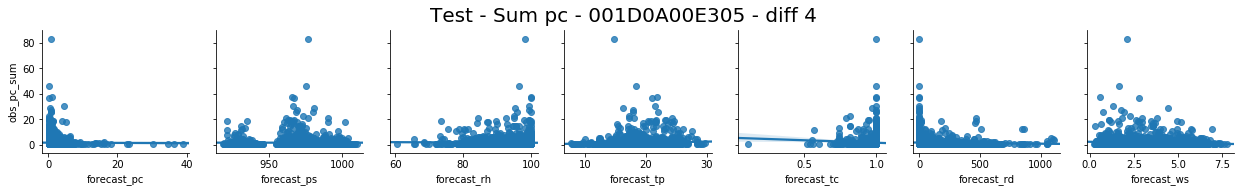

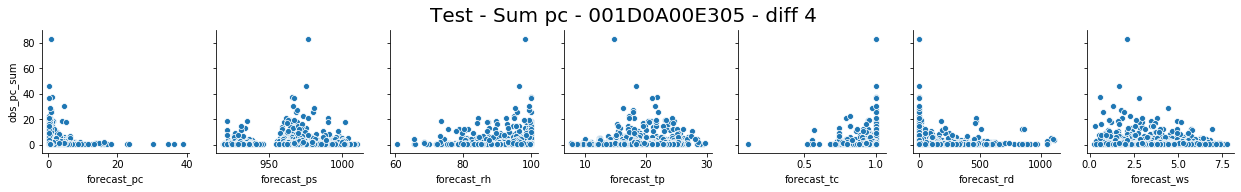

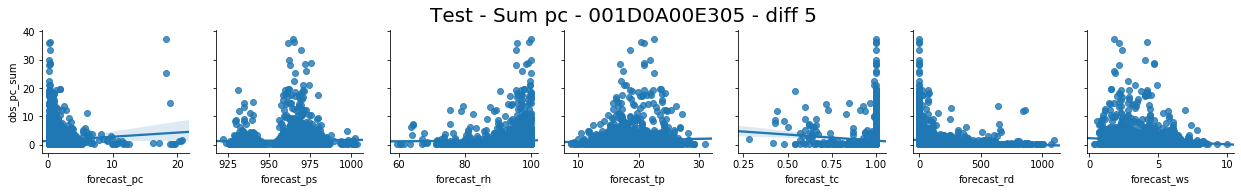

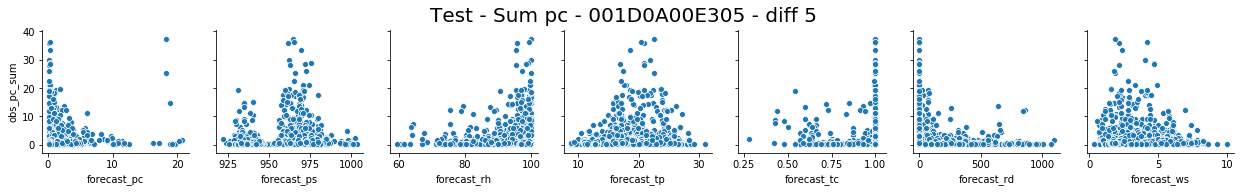

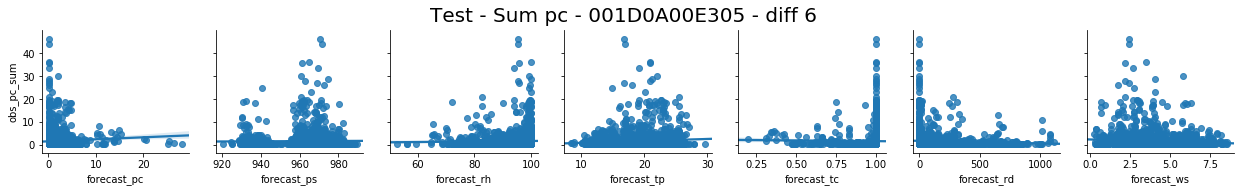

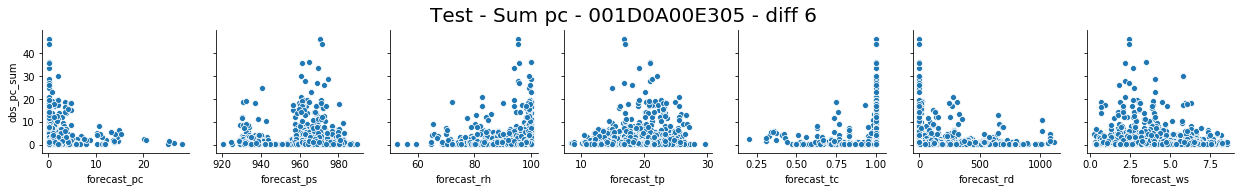

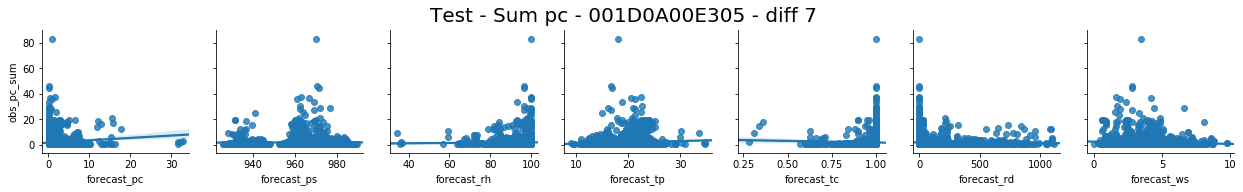

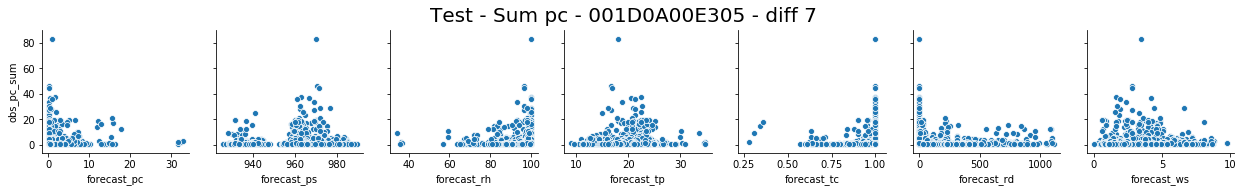

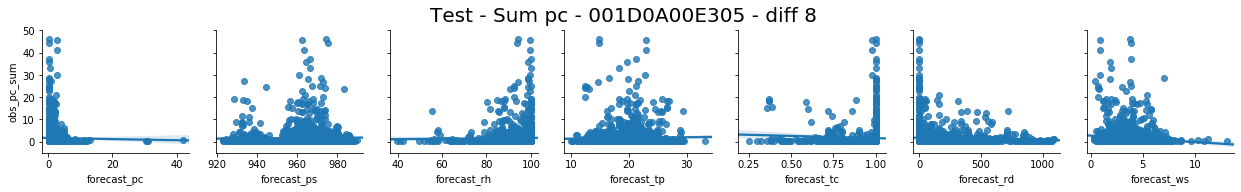

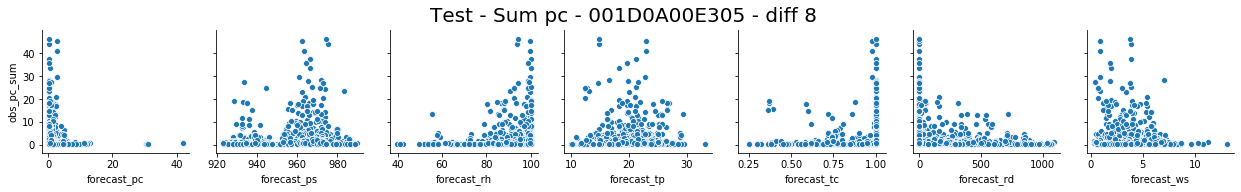

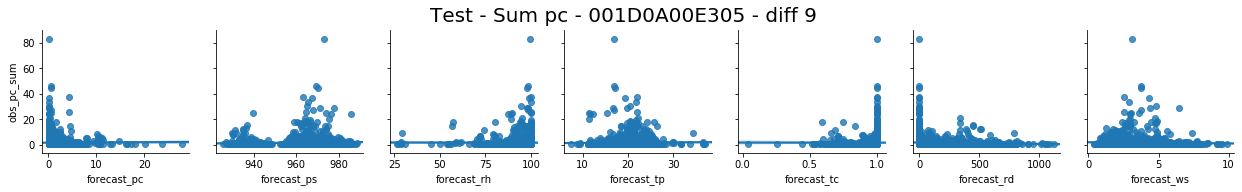

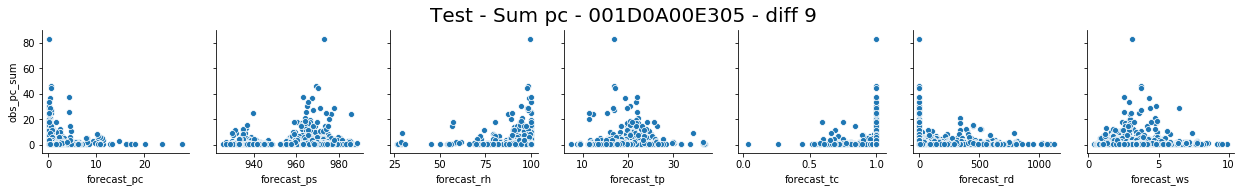

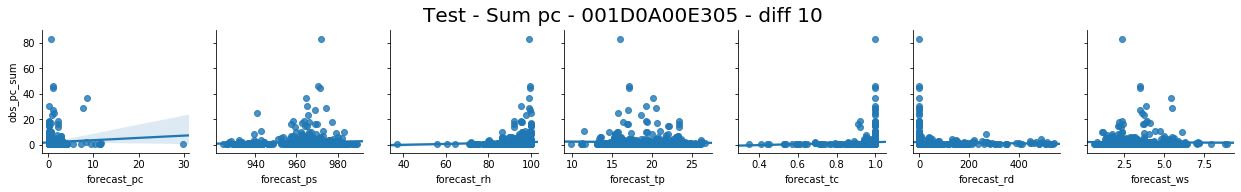

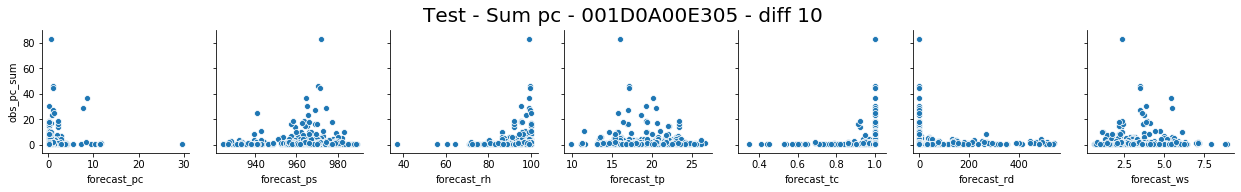

In [ ]:
for station in stations:
    for diff_date in diff_dates:
        print(f'##################################### {station} - diff {diff_date} #####################################')
        data_print = df_subset_SD10DM_day[(df_subset_SD10DM_day['diff_date']==diff_date) & (df_subset_SD10DM_day['forecast_pc']!=0) & (df_subset_SD10DM_day['obs_pc_sum']!=0)]     
        ax = None         
        ax  = sns.pairplot(data_print,y_vars='obs_pc_sum',x_vars=['forecast_pc','forecast_ps','forecast_rh','forecast_tp','forecast_tc','forecast_rd','forecast_ws'],kind='reg')
        ax.fig.suptitle(f'Test - Sum pc - {station} - diff {diff_date}',fontsize=20,y=1.05)
        ax.savefig(directory+    f'graphics/reg_pairplot_SD10DM_{station}_diff_date_{str(diff_date).zfill(2)}.png')
        ax = None
        ax  = sns.pairplot(data_print,y_vars='obs_pc_sum',x_vars=['forecast_pc','forecast_ps','forecast_rh','forecast_tp','forecast_tc','forecast_rd','forecast_ws'],kind='scatter')
        ax.fig.suptitle(f'Test - Sum pc - {station} - diff {diff_date}',fontsize=20,y=1.05)
        ax.savefig(directory+    f'graphics/scatter_pairplot_SD10DM_{station}_diff_date_{str(diff_date).zfill(2)}.png')

In [ ]:
for station in stations:
    for diff_date in diff_dates:
        print(f'##################################### {station} - diff {diff_date} #####################################')
        data_print = df_subset_SD10DM_day[(df_subset_SD10DM_day['diff_date']==diff_date) & (df_subset_SD10DM_day['forecast_pc']!=0) & (df_subset_SD10DM_day['obs_pc_sum']!=0)]
        ax  = sns.pairplot(data_print)      
        ax.fig.suptitle(f'SD10DM - {station} - diff_date {diff_date}',fontsize=20,y=1.05)  
        ax.savefig(directory+    f'graphics/all_pairplot_SD10DM_{station}_diff_date_{str(diff_date).zfill(2)}.png')

##################################### 001D0A00E2C7 - diff 0 #####################################
##################################### 001D0A00E2C7 - diff 1 #####################################
##################################### 001D0A00E2C7 - diff 2 #####################################
##################################### 001D0A00E2C7 - diff 3 #####################################
##################################### 001D0A00E2C7 - diff 4 #####################################
##################################### 001D0A00E2C7 - diff 5 #####################################
##################################### 001D0A00E2C7 - diff 6 #####################################
##################################### 001D0A00E2C7 - diff 7 #####################################
##################################### 001D0A00E2C7 - diff 8 #####################################
##################################### 001D0A00E2C7 - diff 9 #####################################
####################

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


##################################### 001D0A00D684 - diff 10 #####################################
##################################### 001D0A00D0D9 - diff 0 #####################################
##################################### 001D0A00D0D9 - diff 1 #####################################
##################################### 001D0A00D0D9 - diff 2 #####################################
##################################### 001D0A00D0D9 - diff 3 #####################################
##################################### 001D0A00D0D9 - diff 4 #####################################
##################################### 001D0A00D0D9 - diff 5 #####################################
##################################### 001D0A00D0D9 - diff 6 #####################################
##################################### 001D0A00D0D9 - diff 7 #####################################
##################################### 001D0A00D0D9 - diff 8 #####################################
